# Proyecto 03: Aplicaciones actuales - Series de tiempo

## Responsable: <font color='darkred'>**Juan Esteban Serna Vega**</font>  

### Asignación: <font color='darkred'>Implementar un modelo para predecir el flujo vehicular en una autopista de la Ciudad de Buenos Aires, Argentina.</font> 

### Github para asignación: https://github.com/jnserna/tsa1.

### Parte A - Exploración de Datos
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
Elige preguntas que creas que puedas responder con este dataset. Por ejemplo, ¿Cuáles son los días y horarios de mayor tráfico?<br />
También, estudia autocorrelaciones, resampleos, etc.<br />
</div>

#### Componentes de la serie:
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
    1. Calcular las componentes estacionales y tendencia de la serie. Interpretar los resultados, si es necesario con información auxiliar (por fuera del dataset) o elementos del dataset que no estés utilizando (por ejemplo, si la tendencia es negativa, ¿puede ser porque se migre a otras formas de pago?).<br />
    2. ¿La serie posee valores atípicos? Si es así, interpreta, si es necesario con información auxiliar.
<br />
</div>


### Parte B - Predicción a Futuro
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
Implementar un modelo que prediga el tráfico en la autopista Illia para el último trimestre del 2019. 

1. Haz todas las transformaciones de datos que consideres necesarias. Justifica.
1. Evalúa de forma apropiada tus resultados. Justifica la métrica elegida.
1. Elige un modelo benchmark y compara tus resultados con este modelo.
1. Optimiza los hiperparámetros de tu modelo. 
1. Intenta responder la pregunta: ¿Qué información está usando el modelo para predecir?
1. Utiliza el modelo creado para predecir el tráfico en el año 2020. ¿Cómo funciona?
1. Si lo deseas, puedes agregar información de años anteriores a 2017. ¿Mejoran los resultados?
<br />
</div>

### Parte C - Para pensar, investigar y, opcionalmente, implementar
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?<br />
2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?<br />
3. ¿Hay algo que te gustaría investigar o probar?
<br />
</div>

### Preparación del Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import datetime
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
import itertools

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf

from colorama import Fore
sns.set()
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

#plt.style.use('fivethirtyeight')
#['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn',
#'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook',
#'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
plt.style.use('tableau-colorblind10')

# Lectura de datos
data_2020 = pd.read_csv('flujo-vehicular-2020.csv', sep =',')
data_2019 = pd.read_csv('flujo-vehicular-2019.csv', sep =',')
data_2018 = pd.read_csv('flujo-vehicular-2018.csv', sep =',')
data_2017 = pd.read_csv('flujo-vehicular-2017.csv', sep =',')

data_2020.info()
print()
data_2020.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2533743 entries, 0 to 2533742
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   periodo         float64
 1   fecha           object 
 2   mes             object 
 3   dia             object 
 4   dia_fecha       float64
 5   hora_inicio     float64
 6   hora_fin        float64
 7   estacion        object 
 8   tipo_vehiculo   object 
 9   forma_pago      object 
 10  observacion     object 
 11  sentido         object 
 12  cantidad_pasos  float64
dtypes: float64(5), object(8)
memory usage: 251.3+ MB



,periodo,fecha,mes,dia,dia_fecha,hora_inicio,hora_fin,estacion,tipo_vehiculo,forma_pago,observacion,sentido,cantidad_pasos
0,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Centro,24.0
1,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Efectivo,Efectivo,Provincia,80.0
2,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en Infracción,Provincia,1.0
3,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Centro,1.0
4,2020.0,2020-01-01 00:00:00,enero,Miércoles,1.0,0.0,1.0,ALBERDI,Auto,Rec.Deuda,Paso en infracción con Multa LPR,Provincia,1.0


In [2]:
data_2019.info()
data_2019.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 812153 entries, 0 to 812152
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   periodo         812153 non-null  int64 
 1   fecha           812153 non-null  object
 2   hora_inicio     812153 non-null  int64 
 3   hora_fin        812153 non-null  int64 
 4   dia             812153 non-null  object
 5   estacion        812153 non-null  object
 6   sentido         812153 non-null  object
 7   tipo_vehiculo   812153 non-null  object
 8   forma_pago      812153 non-null  object
 9   cantidad_pasos  812153 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 62.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,NO COBRADO,22
1,2019,2019-01-01,0,1,Martes,Alberti,Centro,Liviano,TELEPASE,6
2,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,NO COBRADO,53
3,2019,2019-01-01,0,1,Martes,Alberti,Provincia,Liviano,TELEPASE,18
4,2019,2019-01-01,0,1,Martes,Avellaneda,Centro,Liviano,EFECTIVO,16


In [3]:
data_2018.info()
data_2018.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1375908 entries, 0 to 1375907
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1375908 non-null  int64 
 1   fecha           1375908 non-null  object
 2   hora_inicio     1375908 non-null  int64 
 3   hora_fin        1375908 non-null  int64 
 4   dia             1375908 non-null  object
 5   estacion        1375908 non-null  object
 6   sentido         1375908 non-null  object
 7   tipo_vehiculo   1375908 non-null  object
 8   forma_pago      1375908 non-null  object
 9   cantidad_pasos  1375908 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 105.0+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,NO COBRADO,29
1,2018,2018-01-01,0,1,Lunes,Alberdi,Centro,Liviano,TELEPASE,9
2,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,NO COBRADO,73
3,2018,2018-01-01,1,2,Lunes,Alberdi,Centro,Liviano,TELEPASE,39
4,2018,2018-01-01,2,3,Lunes,Alberdi,Centro,Liviano,NO COBRADO,115


In [4]:
data_2017.info()
data_2017.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372645 entries, 0 to 1372644
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   periodo         1372645 non-null  int64 
 1   fecha           1372645 non-null  object
 2   hora_inicio     1372645 non-null  int64 
 3   hora_fin        1372645 non-null  int64 
 4   dia             1372645 non-null  object
 5   estacion        1372645 non-null  object
 6   sentido         1372645 non-null  object
 7   tipo_vehiculo   1372645 non-null  object
 8   forma_pago      1372645 non-null  object
 9   cantidad_pasos  1372645 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 104.7+ MB


,periodo,fecha,hora_inicio,hora_fin,dia,estacion,sentido,tipo_vehiculo,forma_pago,cantidad_pasos
0,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,NO COBRADO,25
1,2017,2017-01-01,0,1,Domingo,Alberdi,Centro,Liviano,TELEPASE,7
2,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,NO COBRADO,5
3,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,2
4,2017,2017-01-01,1,2,Domingo,Alberdi,Centro,Liviano,EFECTIVO,94


Valores toman los campos **estacion, sentido, tipo_vehiculo y forma_pago**:

In [5]:
print(color.BOLD +'estación' + color.END)
print(data_2020['estacion'].unique())
print(data_2019['estacion'].unique())
print(data_2018['estacion'].unique())
print(data_2017['estacion'].unique())
print()
print(color.BOLD +'sentido' + color.END)
print(data_2020['sentido'].unique())
print(data_2019['sentido'].unique())
print(data_2018['sentido'].unique())
print(data_2017['sentido'].unique())
print()
print(color.BOLD +'tipo_vehiculo' + color.END)
print(data_2020['tipo_vehiculo'].unique())
print(data_2019['tipo_vehiculo'].unique())
print(data_2018['tipo_vehiculo'].unique())
print(data_2017['tipo_vehiculo'].unique())
print()
print(color.BOLD +'forma_pago' + color.END)
print(data_2020['forma_pago'].unique())
print(data_2019['forma_pago'].unique())
print(data_2018['forma_pago'].unique())
print(data_2017['forma_pago'].unique())
print()

estación
['ALBERDI' 'AVELLANEDA' 'DELLEPIANE LINIERSLEPIANE CENTRO'
 'DELLEPIANE LINIERS' 'ILLIA' 'ILP' 'PB1' 'PB3' 'PB4' 'RETIRO' 'SALGUERO'
 'SARMIENTO' 'PB2']
['Alberti' 'Avellaneda' 'Dellepiane' 'Illia' 'Retiro' 'Salguero'
 'Sarmiento' 'PDB']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']
['Alberdi' 'Avellaneda' 'Dellepiane Centro' 'Dellepiane Liniers' 'Illia'
 'Retiro' 'Salguero' 'Sarmiento']

sentido
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']
['Centro' 'Provincia']

tipo_vehiculo
['Auto' 'Auto con trailer' 'Moto' 'N/D' 'Pago Doble Auto'
 'Pago Doble Auto con trailer / Pesado 2 Ejes' 'Pago doble Moto'
 'Pesados 2 Ejes' 'Pesados 3 Ejes' 'Pesados 4 Ejes' 'Pesados 5 Ejes'
 'Pesados 6 Ejes']
['Liviano' 'Pesado']
['Liviano' 'Pesado']
['Liviano' 'Pesado']

forma_pago
['Efectivo' 'Rec.Deuda' 'Tarjeta Magnética' 'Tag' 'Exento' 'Violación'
 'CPP' 'Mercado Pago']
['NO COBRADO' 'TELEPASE' 'EFECTIVO' 'EXENTO

Se puede decir entonces que los años 2017, 2018, 2019 y 2020 tienen las siguientes columnas con la siguiente información:

**periodo**: año del dataset 

**fecha**: año dia mes

**hora_inicio** hora de inicio de la cuenta de vehiculos (DROP)

**hora_fin** hora de fin de la cuenta de vehiculos (Vamos a usar esta para tomar la hora)

**dia**: dia de la semana 

**estacion**: estaciones de peaje, difieren levemente entre los años (Dellepiane se unifica en 2019, antes habia Dellepiane Liniers y Centro, y se agrega PDB)

**sentido**: Centro o Provincia

**tipo_vehiculo**: Liviano o Pesado

**forma_pago**: Hay varias y varian entre los años.

**cantidad_pasos**: Cantidad de vehiculos

Se trabajará con la estación **Illia** y la forma de pago **Efectivo**

In [6]:
# Unimos los 3 datasets, podemos hacerlo así directamente ya que tienen las mismas columnas
dataset = pd.concat([data_2019, data_2018, data_2017])

# Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset.estacion=='Illia', dataset.forma_pago == 'EFECTIVO')
dataset = dataset[mask]

# Quitamos las columnas que no vamos a utilizar
dataset.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
print(dataset.shape)
dataset.head()

(238869, 6)


,fecha,hora_fin,dia,sentido,tipo_vehiculo,cantidad_pasos
80,2019-01-01,2,Martes,Centro,Liviano,537
86,2019-01-01,2,Martes,Centro,Pesado,1
88,2019-01-01,2,Martes,Provincia,Liviano,443
94,2019-01-01,2,Martes,Provincia,Pesado,1
149,2019-01-01,3,Martes,Centro,Liviano,769


In [7]:
# Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset['fecha2'] = pd.to_datetime(dataset.fecha) + pd.to_timedelta(dataset.hora_fin, unit = 'h')

# Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset.drop(columns=['fecha','hora_fin'], inplace = True)
print(dataset.shape)
dataset.head()

# Corregimos el nombre de fecha2 a fecha
dataset.rename(columns = {'fecha2':'fecha'}, inplace = True) 
#dataset.head()

# Reordenamos el dataset por fecha
dataset.sort_values('fecha', inplace = True)
dataset.reset_index(drop=True, inplace = True)
dataset

(238869, 5)


,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
1,Domingo,Provincia,Liviano,9,2017-01-01 00:00:00
2,Domingo,Provincia,Liviano,644,2017-01-01 00:00:00
3,Domingo,Provincia,Pesado,6,2017-01-01 00:00:00
4,Domingo,Provincia,Pesado,1,2017-01-01 00:00:00
...,...,...,...,...,...
238864,Martes,Provincia,Liviano,556,2019-12-31 22:00:00
238865,Martes,Provincia,Pesado,1,2019-12-31 22:00:00
238866,Martes,Centro,Liviano,580,2019-12-31 22:00:00
238867,Martes,Centro,Liviano,214,2019-12-31 23:00:00


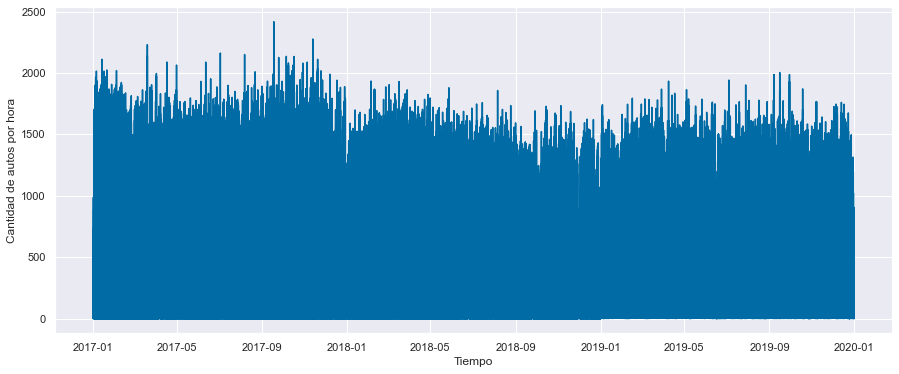

,dia,sentido,tipo_vehiculo,cantidad_pasos,fecha
0,Domingo,Provincia,Pesado,1,2017-01-01
1,Domingo,Provincia,Liviano,9,2017-01-01
2,Domingo,Provincia,Liviano,644,2017-01-01
3,Domingo,Provincia,Pesado,6,2017-01-01
4,Domingo,Provincia,Pesado,1,2017-01-01


In [8]:
# Graficamos nuestros datos, tal como están
plt.figure(figsize = (15,6))
plt.plot(dataset.fecha, dataset.cantidad_pasos)
plt.xlabel('Tiempo')
plt.ylabel('Cantidad de autos por hora')
plt.show()

dataset.head()

In [9]:
# Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario = dataset.resample('D', on = 'fecha').sum()
diario.head()

,cantidad_pasos
fecha,
2017-01-01,31183
2017-01-02,51568
2017-01-03,51093
2017-01-04,53332
2017-01-05,56486


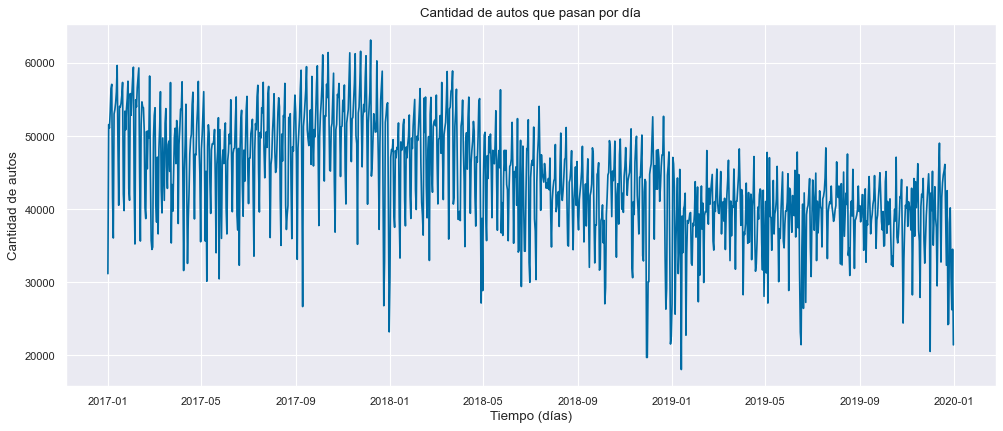

In [54]:
plt.figure(figsize = (15,6), dpi=80)
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad de autos')
plt.title("Cantidad de autos que pasan por día")
plt.show()

### Parte A - Exploración de Datos

**Breve introducción a Series de Tiempo**

¿Qué es una serie de tiempo?
Es un conjunto o serie de observaciones sobre una variable en un horizonte de tiempo. Las observaciones pueden o no ser en intervalos iguales de tiempo.

¿Para qué se estudian las series de tiempo?
El objetivo principal de analizar series de tiempo es conocer el comportamiento de la variable en cuestión. Si se conoce el comportamiento con el paso del tiempo, y bajo el supuesto que no se presentarán cambios fuertes en el futuro, es posible hacer pronósticos. Estas predicciones son valores que se espera tome la variable en un tiempo futuro, y se llega a esos valores utilizando modelos de pronóstico.

Técnicas de predicción en series de tiempo
Hay dos grandes grupos (o formas) de estudiar las series de tiempo.
* Métodos cualitativos: cuando eventos pasados no proporcionan información útil para predecir eventos futuros.
* Métodos cuantitativos: cuando se usa la información de los eventos pasados con el fin de identificar patrones, y con base estos realizar predicciones.

Ahora bien, dentro de los métodos cuantitativos, en los que los datos constituyen la fuente de estudio de patrones de una variable, también hay dos grandes enfoques:
1. Análisis univariante (o individual): se da cuando se trata de explicar una variable a partir de ella misma.
1. Análisis causal: se da cuando se trata de explicar una variable a partir de una o más variables distintitas de ella misma.

El estudio de series de tiempo que popularmente se conoce, trata del primero de estos enfoques. Y es éste mismo el que sustenta el desarrollo teórico del presente análisis.

1. Componentes de una serie de tiempo

Todas las series de tiempo pueden decirse conformadas por componentes. De forma general se consideran:
1. **Tendencia (Trend):** es un patrón de largo plazo caracterizado por la persistencia de crecimiento o decrecimiento de los valores de la serie, 
por tanto refleja el aumento o declinación de la variable de análisis debido a la evolución de factores tecnológicos, demográficos, sociales,
entre otros.
1. **Estacionalidad (Seasonality):** es un patrón de cambio regular que se completa dentro de un período de tiempo específico (casi siempre un año calendario) y que se repite sobre esa base de tiempo.
1. **Error (Error):** son fluctuaciones erráticas alrededor de una constante. No tienen patrón definido. Son afectaciones externas e impredecibles.
1. **Componente cíclica:** se asumen como cambios derivados de fluctuaciones económicas que se dan en períodos largos de tiempo. Por ejemplo: las ventas de propiedad raíz pueden estar afectadas por los ciclos de crecimiento económicos (medidos por el cambio en Producto Interno Bruto -PIB-). Esta componente se incluye en análisis de largos períodos de tiempo.

Partiendo de las componentes mencionadas, se establece que una serie de tiempo *(**Yt**)* es una combinación de sus componentes que puede darse en forma *aditiva* (suma) o *multiplicativa* (multiplicación) de sus componentes.

*Aditiva:* $$Y_t = T_t + S_t + E_t$$ 

*Multiplicativa*: $$Y_t = T_t  \times  S_t \times E_t$$ 

La formas en que se da esa combinación de las componentes también se denominan métodos de descomposición (o técnicas de agregación), siendo sus métodos más comunes los ya señalados: aditivo y multiplicativo.

Para generar la descomposición de la serie estudiada en este caso se prefiere el modelo aditivo por dos razones que se identifican en el análisis gráfico:
1. La estacionalidad no es creciente
1. La serie tiene valores en ceros

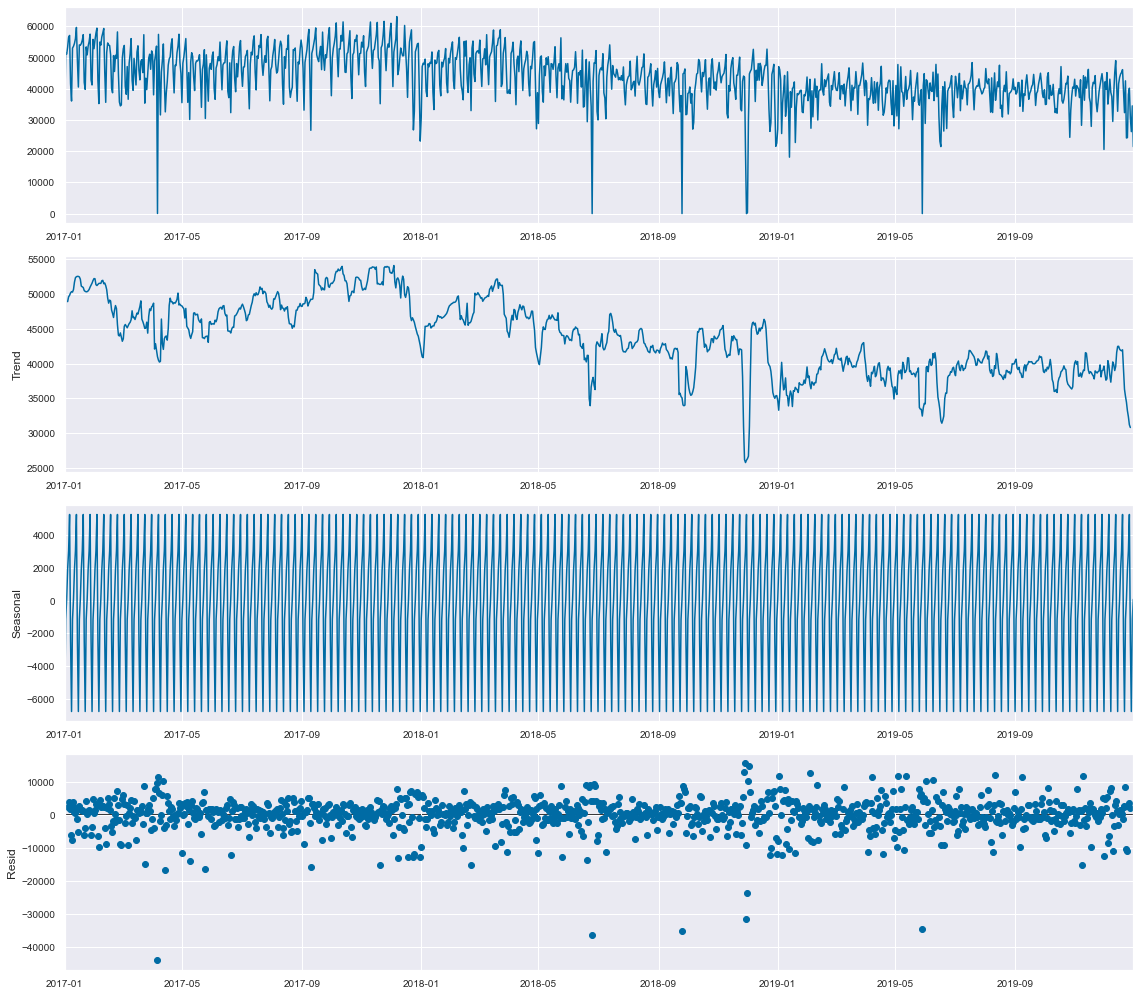

In [11]:
# Decompose
matplotlib.rcParams['axes.labelsize'] = 12
matplotlib.rcParams['xtick.labelsize'] = 10
matplotlib.rcParams['ytick.labelsize'] = 10
matplotlib.rcParams['text.color'] = 'k'

rcParams['figure.figsize'] = 16, 14
series = diario
decomposition = sm.tsa.seasonal_decompose(series, model='additive')
fig = decomposition.plot()
plt.show()

### Tendencia

Cuando esa evolución ocurre de forma altamente predecible, se dice que la tendencia es determinística. Esto es, se puede identificar la
presencia de efectos permanentes sobre la serie de tiempo. Una tendencia determinística suele tener cambios suaves y cierta uniformidad. De forma general, la tendencia determinística se busca modelarla por polinomios de órdenes bajos (hasta grado 3) para mantener la suavidad en el comportamiento. Sin embargo, hay casos donde la tendencia queda mejor modelada por funciones como la exponencial.

Por el contrario, si la evolución es difícil de predecir, se dice que la tendencia es estocástica. En series de este tipo la tendencia es impulsada por choques estocásticos y no siempre presenta un nivel particular hacia el cual tienda a regresar; la serie se mueve hacia donde la obliguen los choques recibidos. Esta tendencia se modela generalmente por caminata aleatoria.

Para el caso de los pasos por la autopista, observando los datos 2017 - 2019 se observa una tendencia general determinística, la cual tiende a la baja desde finales de 2017 y a una estabilización hacia finales de 2019.

Para mejorar la visualización de la estacionalidad, e identificar algunos patrones en las demás gráficas, se hace zoom sobre un año en particular. Se deja en visualización el primer año, pero es posible observar otros tramos de la serie.

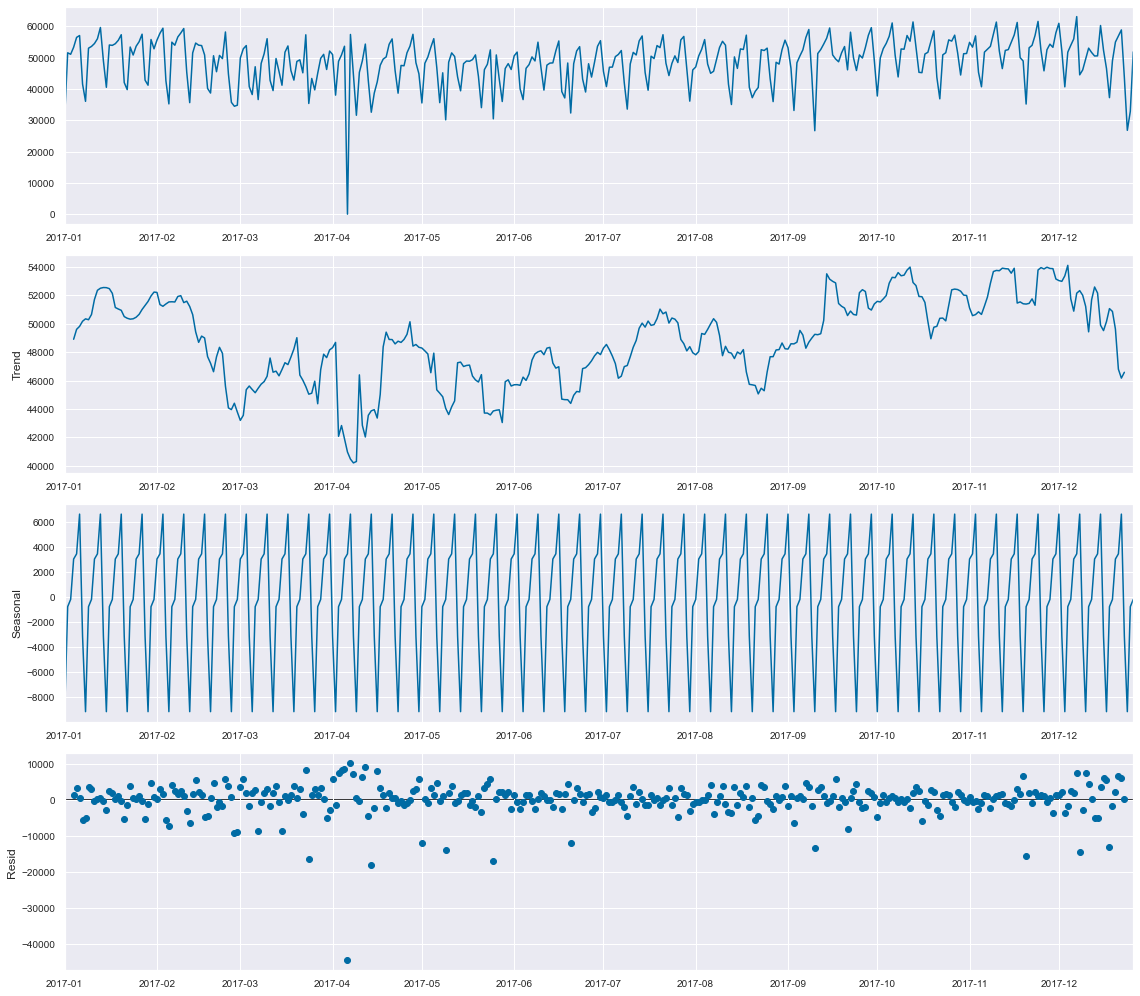

In [12]:
# Haciendo zoom sobre los datos del primer año (2017) para buscar mayor claridad en la estacionalidad.
rcParams['figure.figsize'] = 16, 14
series2 = diario[0:360]
decomposition = sm.tsa.seasonal_decompose(series2, model='additive')
fig = decomposition.plot()
plt.show()

### Estacionalidad

Como ya se mencionó, la estacionalidad es un patrón de cambio regular en un período de tiempo específico (casi siempre un año calendario) y que se repite sobre esa base de tiempo. Este comportamiento se da generalmente por factores repetitivos como estaciones (clima) y consumos que ocurren en períodos particulares, etc. Es decir, eventos que se dan con una periodicidad definida (semanales, mensuales, trimestrales, semestrales, anuales). Por ejemplo, las ventas de productos como helados, bebidas, prendas de vestuario, juguetes, etc. suele estar sujetas a este tipo de patrones.

Al igual que la tendencia, la estacionalidad también puede ser determinística o estocástica. La estacionalidad se puede modelar por regresión o por funciones trigonométricas.

Para la variable de pasos por la autopista, luego de observar la serie global, y también de analizar algunos tramos (años) se identifica un patrón estacional semanal que no cambia en varianza. Esto es, la dimensión (vista gráficamente) del patrón estacional se mantiene igual con el paso del tiempo. Si hubiera presencia de varianza, esto es si la estacionalidad fuera creciente o más pronunciada, se buscaría linealizar un poco la tendencia, por ejemplo con tranformación logarítmica. Dado que la serie presenta varianza constante, es posible decir, por lo menos de forma preliminar, que cumple uno de los supuestos para ser estacionaria.

### Error

Gráficamente se observa que los residuales no presentan un patrón definido y siempre están alrededor de una media. En este caso, la media es cero. Pero no siempre lo es.

A manera de **conclusión** se puede decir que la serie analizada presenta una tendencia general determinística, la cual tiende a la baja desde finales de 2017 y a una estabilización hacia finales de 2019. Adicional se observa un patrón estacional semanal y es de componentes aditivas.

### Conceptos adicionales

**Estacionariedad**: que una serie de tiempo sea estacionaria significa que sus propiedades estadísticas no cambian con el tiempo. Para concluir con mayor certeza que una serie de tiempo es estacionaria se debería identificar que:

1. La media es constante en el tiempo (no tiene tendencia)
1. La varianza es constante en el tiempo
1. La estructura de autocovianza es constante en el tiempo

**Supuesto de normalidad**
* Los errores siguen una distribución normal (distribución gaussiana o distribución de Laplace-Gauss) y su media es cero* 
* Varianza constante (homocedasticidad)


Los conceptos anteriores permiten utilizar un modelo de regresión para el ajuste de series de tiempo, dado que se asume que las relaciones establecidas por en la serie son estables a lo largo del tiempo, esto es, que los parámetros del modelo no cambian. Sin embargo, en la vida real las relaciones comerciales, industriales y económicas pueden variar con el paso del tiempo, por lo que es necesario evaluar e identificar los parámetros del modelo que son variables en el tiempo, en particular cuando hay componente estacional, ya que esta puede no ser constante.

Información adicional: externalidades y cosas que sucedieron en esa vía en esos días: paros? cierres por reparaciones?

2. Valores atípicos

In [13]:
print(dataset.isnull().sum())
print()
print(color.GREEN + 'El dataset no presenta valores faltantes.' + color.END)
print()
print('Sin embargo, gráficamente se observó que hay días con valores muy bajos de tránsito.')
print('Ver gráfica Cantidad de autos que pasan por día.')
print()
print('Esos días y sus valores de tráfico son:')
print()
diario_a=diario[diario.cantidad_pasos <=15000]
diario_a

dia               0
sentido           0
tipo_vehiculo     0
cantidad_pasos    0
fecha             0
dtype: int64

El dataset no presenta valores faltantes.

Sin embargo, gráficamente se observó que hay días con valores muy bajos de tránsito.
Ver gráfica Cantidad de autos que pasan por día.

Esos días y sus valores de tráfico son:



,cantidad_pasos
fecha,
2017-04-06,40
2018-06-25,0
2018-09-25,0
2018-11-30,0
2018-12-01,350
2019-05-29,0


Posibles explicaciones de los valores atípicos

Los valores atípicos de baja cantidad de vehículos transitando en días específicos pueden ser explicados a partir de situaciones anormales. A continuación se comentan algunos casos que pudieron incidir en la situación de tráfico para cada día.
* 2017-04-06: La primera huelga general contra el Presidente Macri. *Fuente: RTVE.*
[Ver más](https://www.rtve.es/noticias/20170406/argentina-afronta-este-jueves-primera-huelga-general-contra-gobierno-macri/1518360.shtml).

* 2018-06-25: Paro general en Argentina. *Fuente: TelesurTV.*
[Ver más](https://www.telesurtv.net/news/tercer-paro-argentina-macri--20180625-0009.html).

* 2018-09-25: Protestas y movilizaciones en rechazo a políticas económicas del Presidente Macri. *Fuente: France24.*
[Ver más](https://www.france24.com/es/20180925-argentina-protestas-macri-huelga-general).

* 2018-11-30: Movilizaciones y protestas en el marco de la cumbre del G-20. *Fuente: Forbes México.*
[Ver más](https://www.forbes.com.mx/cumbre-del-g20-inicia-en-medio-de-protestas-y-fuerte-seguridad/).

* 2018-12-01: Protestas contra modificaciones al sistema pensional. *Fuente: France24.*
[Ver más](https://www.france24.com/es/20171219-protestas-argentina-reforma-violencia-pensiones).

* 2019-02-29: Huelga general. *Fuente: DW.*
[Ver más](https://www.dw.com/es/argentina-gobierno-enfrenta-una-nueva-huelga-general/a-48973717).

Otros datos interesantes del dataset:
- Distribución de los pasos por la estación Illia en función a la forma de pago utilizada. 

In [19]:
datasetx = pd.concat([data_2019, data_2018, data_2017])
datasetx = datasetx[(datasetx.estacion=='Illia')]

#Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
datasetx['fecha2'] = pd.to_datetime(datasetx.fecha) + pd.to_timedelta(datasetx.hora_fin, unit = 'h')

#Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
datasetx.drop(columns=['fecha','hora_fin'], inplace = True)

#Corregimos el nombre de fecha2 a fecha
datasetx.rename(columns = {'fecha2':'fecha'}, inplace = True) 

# creo la col year
datasetx['year'] = datasetx['fecha'].dt.year

# Se crea la tabla dinámica
pd.options.display.float_format = '{:,.0f}'.format
datasetx.pivot_table('cantidad_pasos', ['forma_pago'], 'year', aggfunc=np.sum)

year,2017,2018,2019
forma_pago,,,
EFECTIVO,"17,783,512","15,966,944","14,115,125"
EXENTO,"253,009","194,309","195,205"
INFRACCION,"71,900","104,002","164,907"
MONEDERO,16,nan,nan
NO COBRADO,"495,895","965,732","866,713"
T. DISCAPACIDAD,nan,nan,"120,842"
TARJETA DISCAPACIDAD,"228,553","163,047",nan
TELEPASE,"14,737,699","17,096,004","18,692,375"


- Días y horario de mayor tráfico

         dia  cantidad_pasos
0    Viernes         7647272
1     Jueves         7302169
2  Miércoles         7125526
3     Martes         6865551
4      Lunes         6691387
5     Sábado         6441715
6    Domingo         5791961


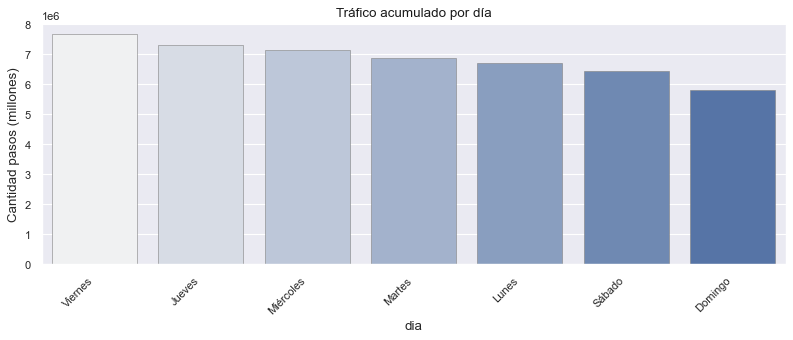

In [42]:
# Días de mayor tráfico

datos_dia = dataset.groupby(['dia'])['cantidad_pasos'].sum().reset_index()
datos_dia = datos_dia.sort_values(['cantidad_pasos'],ascending=False).reset_index(drop=True)
print(datos_dia)

plt.figure(figsize = (12,4), dpi=80)
sns.barplot(data = datos_dia, x = "dia",y= 'cantidad_pasos',linewidth=0.5,edgecolor='grey',color=None, palette='light:b', saturation=0.80)

plt.title("Tráfico acumulado por día")
plt.xticks(rotation=45,ha='right')
plt.ylabel("Cantidad pasos (millones)")
plt.show()

Cantidad de pasos (acumulados) según hora del día: 

    hora  cantidad_pasos
0     18         3115036
1     19         3071455
2     14         3005578
3     17         2993721
4     16         2969568
5     15         2933388
6     13         2907990
7     12         2729369
8     20         2661885
9     11         2551110
10     9         2476701
11    10         2471790
12    21         2339949
13     8         2276977
14    22         1875810
15     7         1564013
16    23         1412685
17     0         1057141
18     1          879116
19     6          781617
20     2          614594
21     3          429898
22     5          411330
23     4          334860 



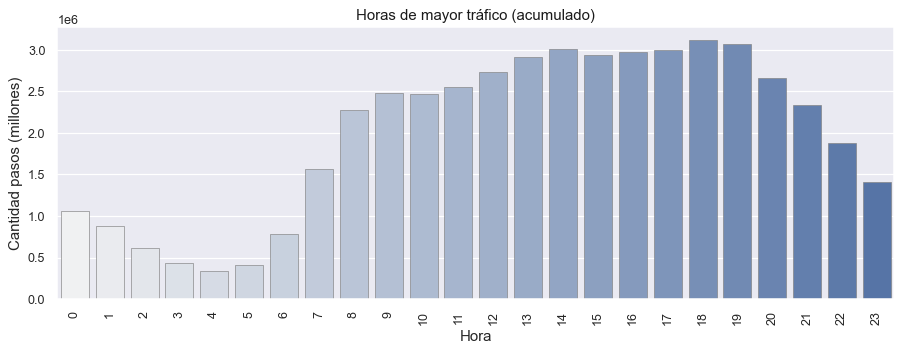

In [49]:
# Horario de mayor tráfico

datos_hora = dataset.copy()
datos_hora["hora"] = datos_hora["fecha"].dt.hour
print("Cantidad de pasos (acumulados) según hora del día:","\n")

datos_hora_v = datos_hora.groupby(['hora'])['cantidad_pasos'].sum().reset_index()
datos_hora_v = datos_hora_v.sort_values(['cantidad_pasos'],ascending=False).reset_index(drop=True)
print(datos_hora_v,"\n")

plt.figure(figsize = (12,4), dpi=90)
sns.barplot(data = datos_hora_v, x = "hora", y = 'cantidad_pasos', linewidth = 0.5, edgecolor = 'grey',
            color = None, palette = 'light:b', saturation = 0.80)

plt.title("Horas de mayor tráfico (acumulado)")
plt.xticks(rotation=90,ha='center')
plt.xlabel("Hora")
plt.ylabel("Cantidad pasos (millones)")
plt.show()

**Tratamiento sobre los datos**

Para el caso de estudio se aplicarán dos tratamientos de datos sobre el dataset. A saber: tratamiento de **outliers** y **resampleo**.

- Tratamiento de outliers

Dado que los datos vistos por día presentan valores en ceros y algunos días con cifras muy bajas de tránsito, es de esperar que los modelos de pronóstico reduzcan su buen desempeño cuando se presentan estos valores atípicos dentro de los datos originales. Adicional, como principio de los pronósticos se espera que se cumpla el supuesto de continuidad, que asume que algunos patrones dados en el pasado continuarán en el futuro.

Por tales razones se decide tratar esos outliers y asignarles valores. Es difícil predecir externalidades que suspendan por completo el tráfico en la autopista (huelgas, paros o eventos catastróficos). Por lo tanto es preferible asumir continuidad en el tráfico por días de la autopista.

Cuando se va a implementar una interpolación, es necesario tener claridad si los datos de la serie son igualmente espaciados o no. Adicional, es importante saber que hay diversos métodos (globales o locales) y criterios o técnicas de interpolación (movimiento o puente Browniano, suavizado Kernel, vecinos más cercanos, entre otros.). Atendiendo al problema de este dataset, que refiere a tránsito de vehículos por una autopista, se decide tratar los ouliers con la técnica de vecinos más cercanos. Como consideración adicional para el tratamiento, se destaca que solo se modifican los datos de seis días de una muestra de tres años de registros.

In [50]:
#Los datos atípicos se reemplazan por nan
diario.cantidad_pasos[diario.cantidad_pasos <=15000] = np.nan
# Se imprimen para verificar valores
print(diario.isna().sum())
# Se indica el criterio para interpolar
diario = diario.interpolate(method='nearest', k=4)
# Se verifica el cambio
print(diario.isna().sum())

cantidad_pasos    6
dtype: int64
cantidad_pasos    0
dtype: int64


Luego el dataset gráficamente (sin outliers) se ve de esta manera:

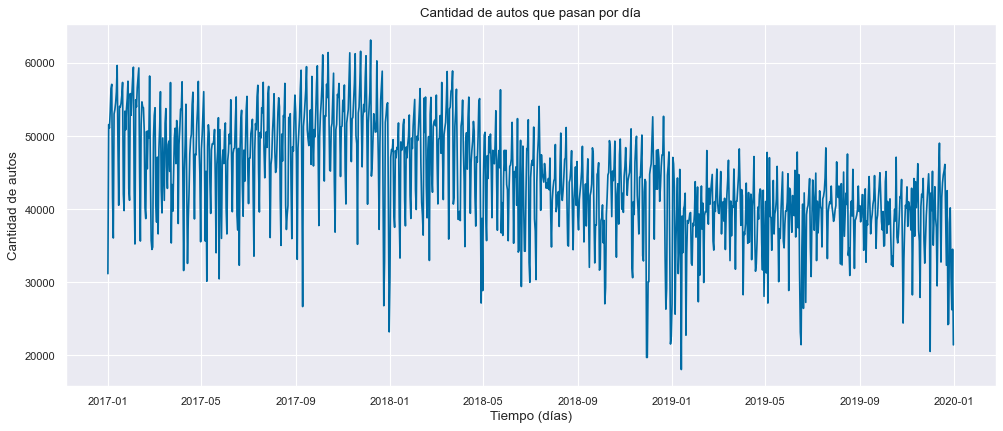

In [53]:
plt.figure(figsize = (15,6), dpi=80)
plt.plot(diario.index, diario.cantidad_pasos)
plt.xlabel('Tiempo (días)')
plt.ylabel('Cantidad de autos')
plt.title("Cantidad de autos que pasan por día")
plt.show()

- Resampleo

Esta transformación (también llamada remuestreo), al igual que casi todas las realizadas sobre los dataset, se realiza para mejorar la predictibilidad de los datos. El resampleo de series puede darse en dos formas:
1. Aumentando la frecuencia de los datos (upsampling)
2. Reduciendo la frecuencia de los datos (downsampilng)

Para este caso, se hace un ***downsampling*** de días a semanas. Este resampleo reduce incertidumbre y complejidad para los pronósticos dado que no exige el uso de patrones diarios. Como se observó en el decompose, en la vista por semanas ya se identifica estacionalidad. Adicional, es posible hacerlo dado que el resultado final de la predicción del modelo no obliga a ser presentado por días.

El resampleo de días a semanas puede generarse en forma de suma o en forma de promedio. La diferencia se genera en el peso que se le da a los días al considerar el promedio, y en la escala que se genera si se trabaja con la acumulación de datos o con el promedio. Lo importante de seleccionar sum o mean es que no se pierdan o se alteren significativamente los patrones de la serie. Las siguientes dos ejecuciones permiten verificar gráficamente que los patrones de los datos no se alteran.

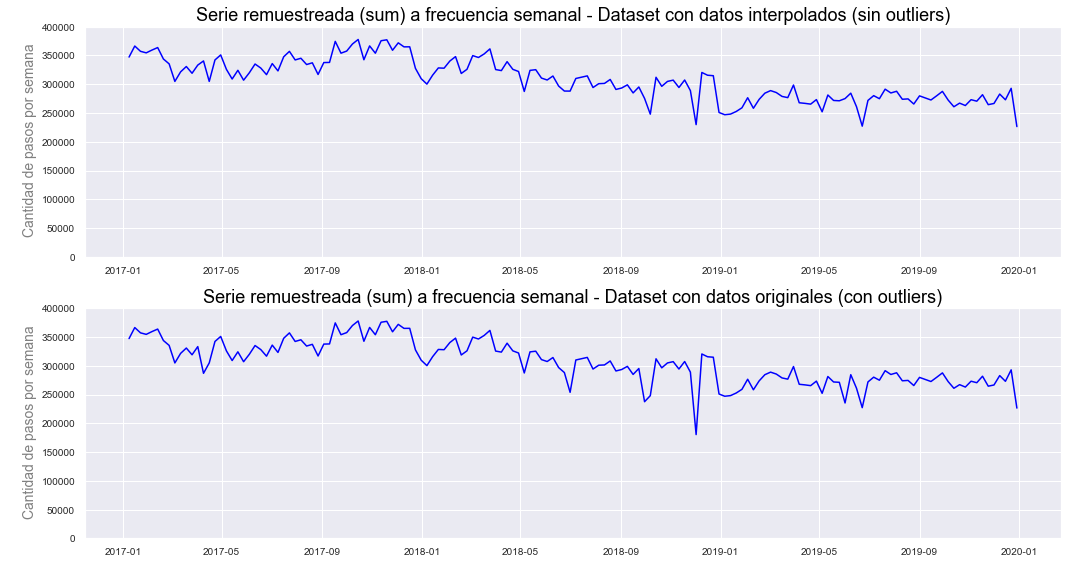

In [76]:
# Transformación a semanal por sumas (a la base sin ceros y sin outliers)
semanal = diario.resample('W').sum()
# Se quitan unos datos de semanas que están incompletas
semanal = semanal[(semanal.index >='2017-01-08')&(semanal.index <='2019-12-29')]

# Transformación a semanal por medias (a la base sin ceros y sin outliers)
semanal_m = diario.resample('W').mean()
# Se quitan unos datos de semanas que están incompletas
semanal_m = semanal_m[(semanal_m.index >='2017-01-08')&(semanal_m.index <='2019-12-29')]

# Esta transformación incluye los valores ceros y los otros outliers
semanal_1 = dataset.resample('W', on = 'fecha').sum()
# Se quitan unos datos de semanas que están incompletas
semanal_1 = semanal_1[(semanal_1.index >='2017-01-08')&(semanal_1.index <='2019-12-29')]

plt.figure(figsize = (15,8))
Gs= gridspec.GridSpec(2,1)
ax0= plt.subplot(Gs[0])
plt.plot(semanal.index, semanal.cantidad_pasos,color='blue')
plt.title("Serie remuestreada (sum) a frecuencia semanal - Dataset con datos interpolados (sin outliers)", color= 'black', fontsize= 18)
plt.ylabel('\n Cantidad de pasos por semana', color= 'gray', fontsize= 14)
plt.ylim(0,400000)
ax1= plt.subplot(Gs[1])
plt.plot(semanal_1.index, semanal_1.cantidad_pasos,color='blue')
plt.title("Serie remuestreada (sum) a frecuencia semanal - Dataset con datos originales (con outliers)", color= 'black', fontsize= 18)
plt.ylabel('\n Cantidad de pasos por semana', color= 'gray', fontsize= 14)
plt.ylim(0,400000)
plt.tight_layout()
plt.show()

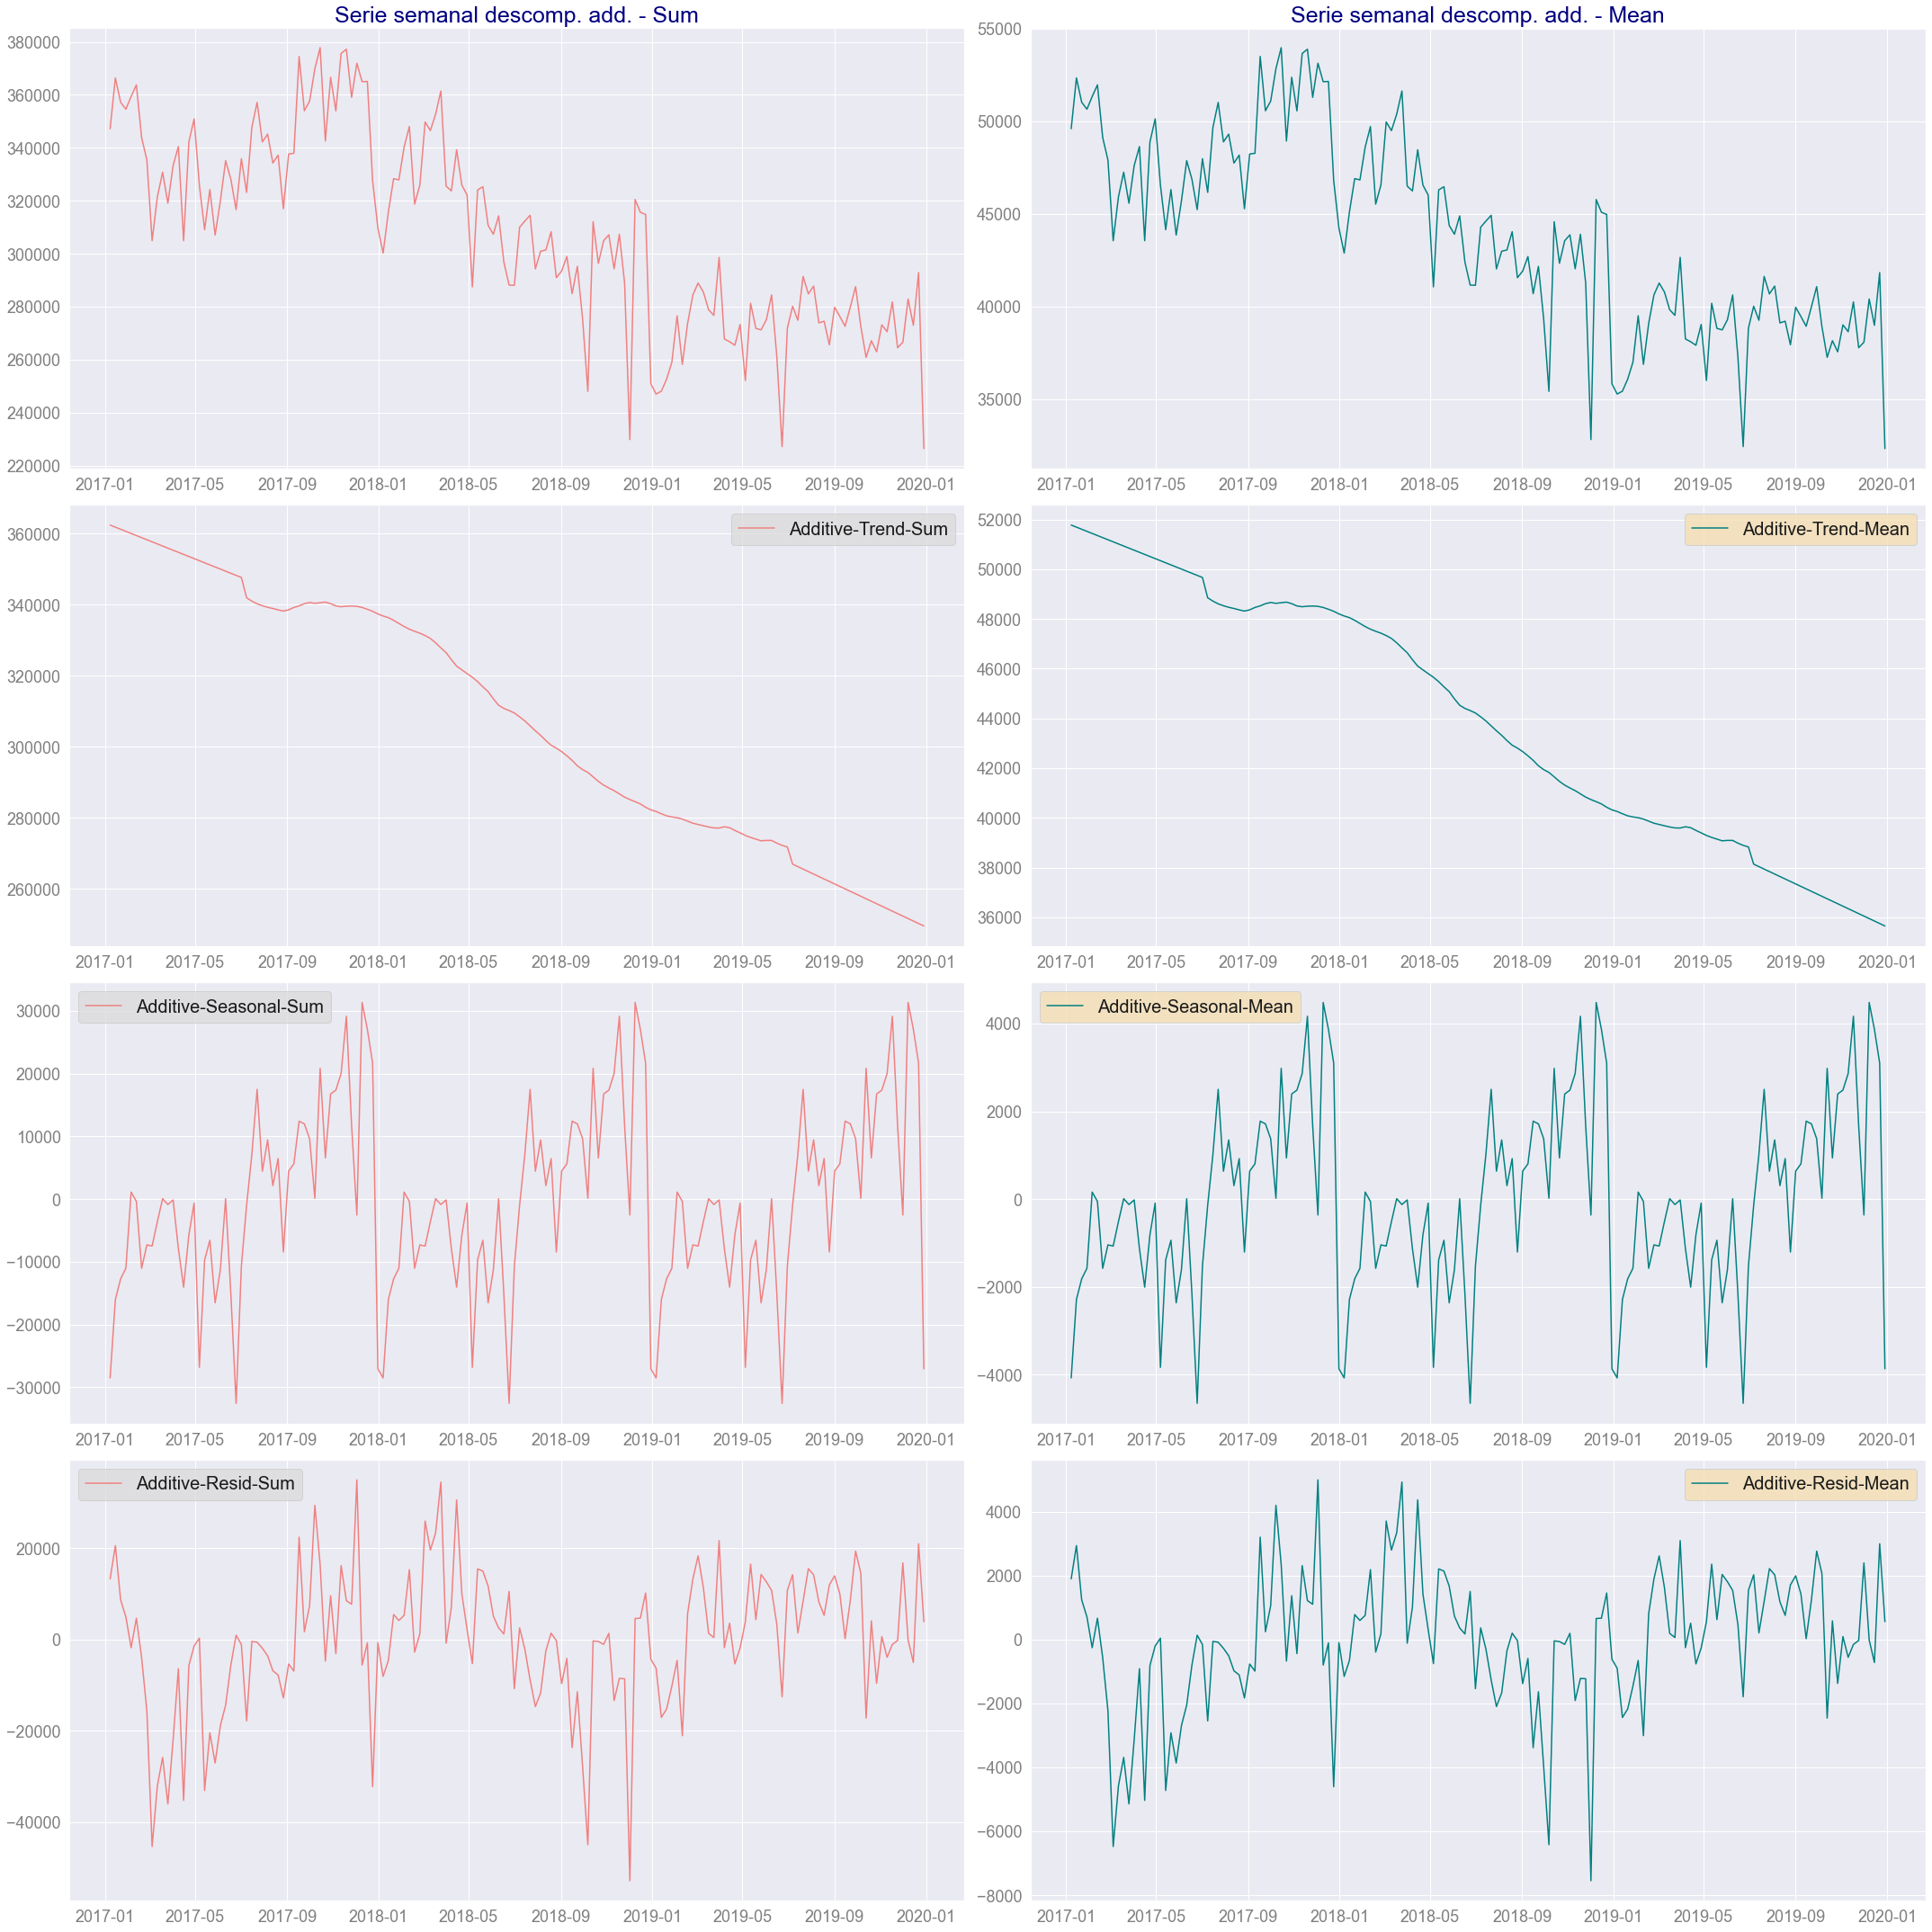

In [77]:
# Comparativa de las series vistas en sus descomposiciones.

# Para este punto se puede usar aditiva o multi porque ya no hay ceros. Se toman todo aditivo.
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.tsa as tsa

# Descomposicón aditiva
result_sum = tsa.seasonal.seasonal_decompose(semanal.cantidad_pasos, model='additive', extrapolate_trend='freq')
result_mean = tsa.seasonal.seasonal_decompose(semanal_m.cantidad_pasos, model='additive', extrapolate_trend='freq')

plt.figure(figsize = (30,30))
Gs= gridspec.GridSpec(4,2)

ax0= plt.subplot(Gs[0])
plt.plot(semanal,color='lightcoral')
plt.title("Serie semanal descomp. add. - Sum", color= 'navy', fontsize= 25)
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18)

ax1= plt.subplot(Gs[1])
plt.plot(semanal_m,color='teal')
plt.title("Serie semanal descomp. add. - Mean", color= 'navy', fontsize= 25)
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18)

ax2= plt.subplot(Gs[2])
plt.plot(result_sum.trend,color='lightcoral', label='Additive-Trend-Sum')
plt.legend(fontsize=20, facecolor= 'gainsboro')
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18)

ax3= plt.subplot(Gs[3])
plt.plot(result_mean.trend,color='teal', label="Additive-Trend-Mean")
plt.legend(fontsize=20, facecolor= 'wheat')
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18)

ax4= plt.subplot(Gs[4])
plt.plot(result_sum.seasonal,color='lightcoral', label='Additive-Seasonal-Sum')
plt.legend(fontsize=20, facecolor= 'gainsboro')
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18)

ax5= plt.subplot(Gs[5])
plt.plot(result_mean.seasonal,color='teal', label='Additive-Seasonal-Mean')
plt.legend(fontsize=20, facecolor= 'wheat')
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18)

ax6= plt.subplot(Gs[6])
plt.plot(result_sum.resid,color='lightcoral', label='Additive-Resid-Sum')
plt.legend(fontsize=20, facecolor= 'gainsboro', loc= 2)
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18)

ax7= plt.subplot(Gs[7])
plt.plot(result_mean.resid,color='teal', label='Additive-Resid-Mean')
plt.legend(fontsize=20, facecolor= 'wheat', loc= 1)
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18)

plt.tight_layout()
plt.show()

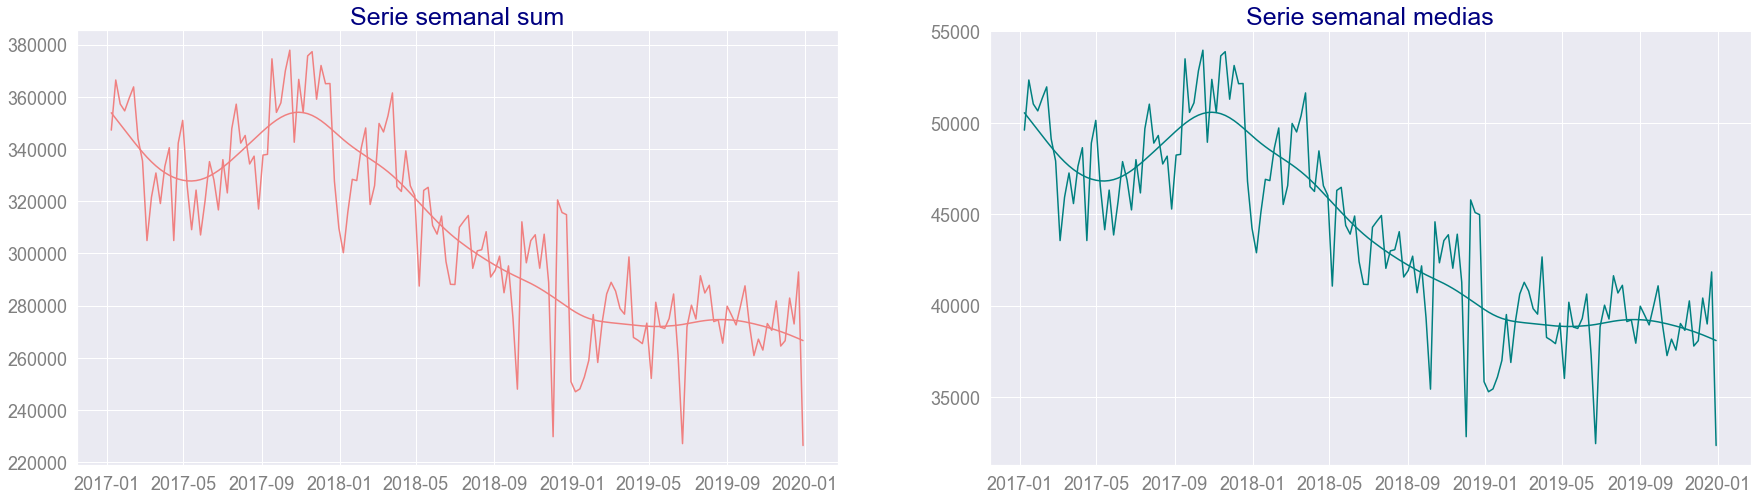

In [78]:
# Se utiliza filtro Hodrick-Prescott para separar en tendencia y componente ciclico
arr2_ciclo, arr2_tend = sm.tsa.filters.hpfilter(semanal)
semanal['tendencia'] = arr2_tend

arr22_ciclo, arr22_tend = sm.tsa.filters.hpfilter(semanal_m)
semanal_m['tendencia'] = arr22_tend

# Sin datos de 2017
semanal_m_2 = semanal_m[52:]

# Gráfico
plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
plt.plot(semanal[['cantidad_pasos', 'tendencia']],color='lightcoral');
plt.title("Serie semanal sum", color= 'navy', fontsize= 25)
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18)

plt.subplot(1,2,2)
plt.plot(semanal_m[['cantidad_pasos', 'tendencia']],color='teal')
plt.title("Serie semanal medias", color= 'navy', fontsize= 25)
plt.xticks( color= 'grey', fontsize= 18)
plt.yticks( color= 'grey', fontsize= 18);

## Autocorrelación

La correlación es la estimación cuantitativa de la relación entre el comportamiento de dos variables. Es posible encontrar diferentes tipos de correlación: 

1. Ambas crecen y decrecen a la vez --> Correlación positiva (valor cercano a 1).
1. Una crece y la otra decrece (o viceversa) --> Correlación negativa (valor cercano a -1).
1. No hay relación entre su comportamiento --> No están correlacionadas (valor alrededor de 0).

La forma más conocida para calcular la correlación es la fórmula de Pearson (o correlación lineal).

Cuando la estimación se hace entre conjuntos de datos de la misma variable, entonces se habla de Autocorrelación, que es el entendimiento de si los eventos pasados influyen en los actuales. Para el cálculo de correlación en series de tiempo es necesario definir unos *lags*, que nos es más que desfasar o correr en el tiempo un conjunto de los datos para calcular la correlación con los datos originales.

Dos series de tiempo están correlacionadas si su comportamiento en el tiempo es parecido (crecen y decrecen juntas) o anti-correlacionadas si una es máxima cuando la otra es mínima (o viceversa).

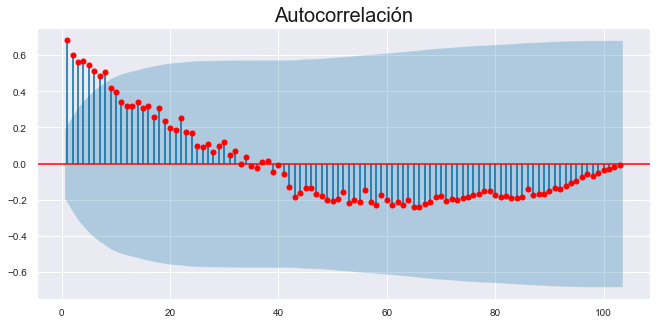

In [82]:
import statsmodels.graphics.tsaplots as sgt

sgt.plot_acf(semanal_m_2['cantidad_pasos'], zero = False, lags = (52*2)-1, color='red')
plt.title("Autocorrelación", size=20)
plt.rc("figure", figsize=(12,5))
plt.show()

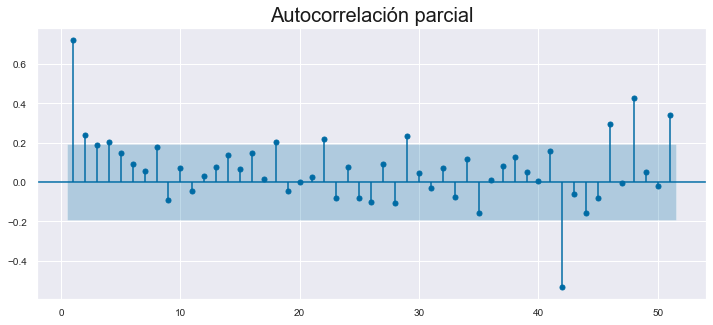

In [83]:
import statsmodels.graphics.tsaplots as sgt
sgt.plot_pacf(semanal_m_2['cantidad_pasos'], lags = 51, zero = False, method = ('ols'))
plt.title("Autocorrelación parcial", size=20)
plt.rc("figure", figsize=(12,5))
plt.show()

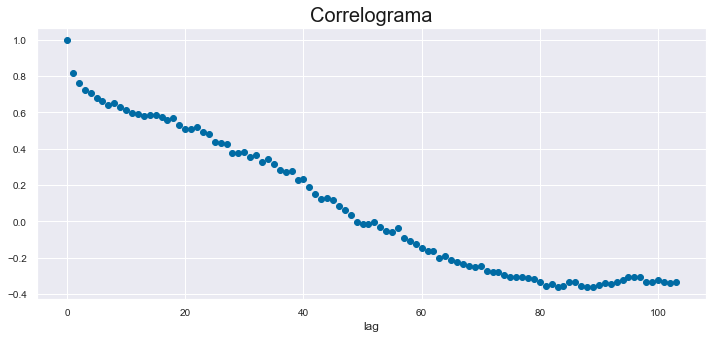

In [84]:
from statsmodels.tsa.stattools import acf
nlags =  (52*2)-1
autocorr = acf(semanal_m.cantidad_pasos, nlags = nlags)

plt.figure(figsize = (12,5))
plt.title("Correlograma", size=20)
plt.scatter(np.arange(nlags+1), autocorr)
plt.xlabel('lag');

A manera de **conclusión** de la exploración de los datos, se decide trabajar con el dataset tipo semanal, que tuvo la interpolación y que fue remuestrado por medias.

### Parte B - Predicción a Futuro

1. Transformaciones de datos: más allá del resampleo y del tratamiento de outliers, no se consideran necesarias otras transformaciones de datos.

2. Modelos seleccionados:
- Modelo 1: Random Forest Regressor
- Modelo 2: SARIMAX

Modelo 1: **Random Forest**

Random Forest está integrado por un *ensemble* o conjunto de árboles de decisión, donde cada árbol ha sido entrenado con una muestra aleatoria de los datos de entrenamiento originales generada a través de *Bootstrapping*. La predicción de una nueva observación proviene de la agregación de los pronósticos obtenidos de los árboles individuales que integran el modelo.

Cuando se da mayor complejidad a un modelo de este tipo, hay mayor flexibilidad para adaptarse a las obervaciones y mejorar la capacidad de pronóstico. Sin embargo, luego de cierto nivel, puede aparecer el *overfitting*, que es cuando el modelo se ajustan tan bien a las observaciones de entrenamiento que es incapaz de predecir nuevos eventos con precisión.

De forma general en árboles pequeños (baja cantidad de ramas) hay poca varianza. Tiene sesgo alto, esto es, no logran representar bien las relaciones entre variables.
Por el contrario, los árboles grandes pueden ajustarse muy bien a los datos de entrenamiento, por lo que pueden tener poco sesgo pero pueden sufrir de alta varianza.

Para contrarestar los efectos anteriormente descritos se usan los métodos de **ensemble**. Estos combinan múltiples modelos para buscar un equilibrio entre sesgo y varianza. Los métodos más populares de *ensemble* sob el **Boosting** y el **Bagging**.

- Boosting: consiste en ajustar múltiples modelos sencillos de forma que cada uno aprende de los errores del anterior.
- Bagging (bootstrap aggregation): consiste en ajustar múltiples modelos cada uno con un conjunto de datos distinto (dentro de los datos de entrenamiento). Luego la predicción incluye las predicciones de cada modelo.

El modelo de **Random Forest** se encuentra dentro de la categoría de **Bagging**.

Para lograr que un modelo de *ensemble* obtengo buenos resultados, es importante que los errores de sus modelos no estén correlacionados.

Las razones para usar este modelo tienen que ver con sus ventajas generales de aplicaciones, que incluyen: selección automática de predictores, y la posibilidad de usarlo con un número grande de datos.

Modelo 2: **SARIMAX**

Algunos conceptos que pueden ser de utilidad para entender este modelo:
- SARIMAX (promedio móvil integrado autoregresivo estacional con factores exógenos) es en el fondo un modelo de regresión lineal que utiliza un modelo ARIMA estacional de residuos.

- ARIMA: media móvil integrada autoregresiva. Proviene de la integración (I) de modelos autoregresivos (AR) con medias móviles (MA).

- Modelos autoregresivos (AR): son aquellos que predicen la siguiente observación basados en observaciones anteriores. Esto es similar a una regresión lineal. La cantidad de puntos anteiores se denomina orden (p).

Para que los ajustes funcionen bien bajo esta metodología, es necesario que los datos cumplan la condición de **estacionariedad**.

Dentro de las motivaciones para usar el modelo SARIMAX se considera lo bien que trabaja con datos estacionales, contrario a lo que pasa sólo con ARIMA.

SARIMAX entonces requiere dos conjuentos de argumentos (p,d,q). Uno que es el mismo que requiere ARIMA, y otro para la estacionalidad.
* p: número de observaciones hacia atrás que considera el modelo para el pronóstico.
* d: número de diferencias entre las observaciones originales.
* q: orden del promedio móvil.

Adicional requiere un argumento S que es la periodicidad del ciclo estacional de los datos. Para datos con estacionalidad anual, S será 12. Para datos con estacionalidad semanal, S será 7.

$$SARIMAX\left(p,d,q\right) x \left(p,d,q,s\right)$$

A continuación el desarollo de ambos modelos y su evaluación.

- Modelo 1: Random Forest

A continuación se desarrolla el Random Forest con los parámetros por defecto, y con 12 datos para predecir el siguiente.

In [404]:
# Preparando los datos para el modelo y posterior pronóstico:

# Semanal Medias
semanal=semanal_m[(semanal_m.index >='2017-01-08')&(semanal_m.index <='2019-12-29')]
# Semana Medias sin datos de 2017
semanal2=semanal_m_2[(semanal_m_2.index >='2017-01-08')&(semanal_m_2.index <='2019-12-29')]

senial = semanal.cantidad_pasos # Datos desde 2017
senial2 = semanal2.cantidad_pasos # Datos desde 2018

In [405]:
# Valores para atrás que vamos a tomar
look_back = 12 # usamos 12 datos (semanas) para predecir el valor siguiente

# Con datos desde 2017
N = senial.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

(143, 12) (143,)


In [406]:
for i in range(X.shape[0]):
    X[i,:] = senial.iloc[i:i+look_back]
    y[i] = senial.iloc[i+look_back]

# train test split con datos desde 2017
N_train = X.shape[0] - look_back # cantidad de instancias que vamos a usar para entrenar. look_back = 12 semanas 
N_test = 12  # cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(131, 12) (131,)
(12, 12) (12,)


In [407]:
# Sin datos de 2017
N2 = senial2.shape[0]
X2 = np.zeros((N2 - look_back - 1,look_back))
y2 = np.zeros(N2 - look_back - 1)
print(X2.shape, y2.shape)

for i in range(X2.shape[0]):
    X2[i,:] = senial2.iloc[i:i+look_back]
    y2[i] = senial2.iloc[i+look_back]

# train test split

N_train2 = X2.shape[0] - look_back # cantidad de instancias que vamos a usar para entrenar. look_back = 12 semanas 
N_test2 = 12  #cantidad de puntos que vamos a usar para evaluar
N_total2 = N_train2 + N_test2

length_total2 = N_train2 + N_test2 + look_back

X_train2 = X2[:N_train2,:]
y_train2 = y2[:N_train2]
print(X_train2.shape, y_train2.shape)

X_test2 = X2[N_train2:N_train2+N_test2,:]
y_test2 = y2[N_train2:N_train2+N_test2]
print(X_test2.shape, y_test2.shape)

(91, 12) (91,)
(79, 12) (79,)
(12, 12) (12,)


In [408]:
# Random forest con datos desde 2017
rf = RandomForestRegressor(random_state=123, n_jobs = -1)

rf.fit(X_train,y_train)
x = rf.fit(X_train,y_train)

y_train_pred_rf1 = rf.predict(X_train)
y_test_pred_rf1 = rf.predict(X_test)

# Random forest regressor sin datos de 2017
rf2 = RandomForestRegressor(random_state=123, n_jobs = -1)

rf2.fit(X_train2,y_train2)
x2 = rf2.fit(X_train2,y_train2)

y_train_pred_rf2 = rf2.predict(X_train2)
y_test_pred_rf2 = rf2.predict(X_test2)

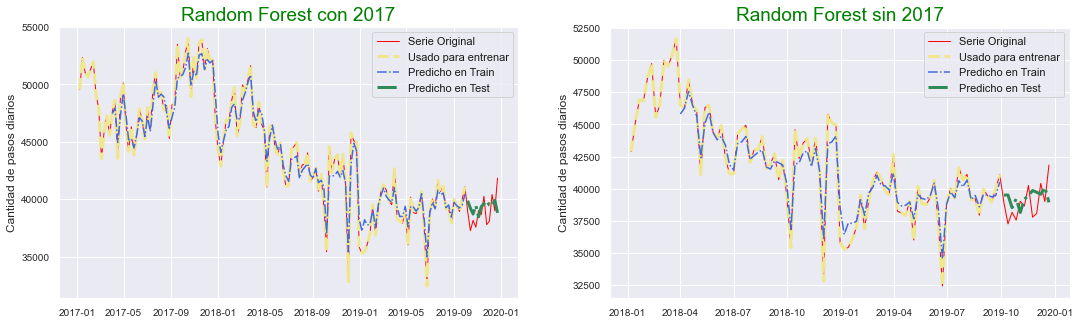

RMSE en Train con 2017: 1036.71
RMSE en Test con 2017: 1503.443 

RMSE en Train sin 2017: 985.543
RMSE en Test sin 2017: 1510.757 



In [409]:
plt.figure(figsize = (28,5))
plt.subplot(1,3,1)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='khaki',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_rf1,'-.',color='royalblue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_rf1,'-.',color='seagreen', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title("Random Forest con 2017", color= 'green', fontsize= 19)
plt.ylabel('Cantidad de pasos diarios')

plt.subplot(1,3,2)
plt.plot(senial2.index[:length_total2], senial2[:length_total2],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial2.index[:N_train2 + look_back], senial2[:N_train2 + look_back],'--', lw = 3,color='khaki',label = 'Usado para entrenar')
plt.plot(senial2.index[look_back: look_back + N_train2], y_train_pred_rf2,'-.',color='royalblue',label = 'Predicho en Train')
plt.plot(senial2.index[N_train2+look_back: length_total2], y_test_pred_rf2,'-.',color='seagreen', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title("Random Forest sin 2017", color= 'green', fontsize= 19)
plt.ylabel('Cantidad de pasos diarios')

plt.show()

rmse_tr_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_rf1))
print('RMSE en Train con 2017:',round(rmse_tr_1,3))

rmse_ts_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_rf1))
print('RMSE en Test con 2017:',round(rmse_ts_1,3),"\n")

rmse_tr_2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_rf2))
print('RMSE en Train sin 2017:',round(rmse_tr_2,3))

rmse_ts_2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_rf2))
print('RMSE en Test sin 2017:',round(rmse_ts_2,3),"\n")

Modelo 2: SARIMAX

Inicialmente se trabaja el modelo con parámetros p, d y q de órdenes bajos (complejidad baja). El valor de s se asigna 7 por la condición de estacionalidad semanal de los datos.

In [410]:
# Definir conjunto de datos con 2017
x = senial[:N_train + look_back]

# Definir conjunto de datos sin 2017
x2 = senial[:N_train + look_back][52:]

# instanciar modelo
sarima_model = SARIMAX(x, order=(2,0,1), seasonal_order=(2, 1, 0, 7))
sarima_model2 = SARIMAX(x2, order=(2,0,1), seasonal_order=(2, 1, 0, 7))

# ajustar modelo
results = sarima_model.fit()
results2 = sarima_model2.fit()

# mirar el AIC
#print(results.aic)
#print(results2.aic)

# predecir
forecast = results.get_forecast(steps=12).predicted_mean
forecast2 = results2.get_forecast(steps=12).predicted_mean

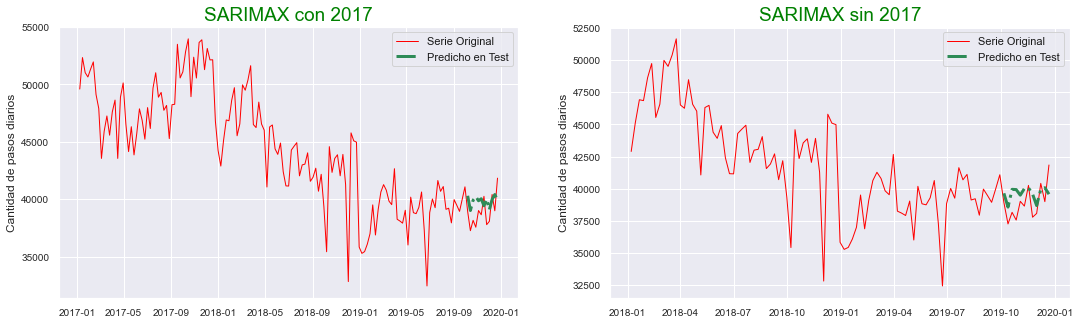

RMSE en Test con 2017: 1588.431
AIC: 2604.417 

RMSE en Test sin 2017: 1392.43
AIC: 1622.498


In [411]:
plt.figure(figsize = (28,5))
plt.subplot(1,3,1)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[N_train+look_back: length_total], forecast,'-.',color='seagreen', lw = 3, label = 'Predicho en Test')
plt.title("SARIMAX con 2017", color= 'green', fontsize= 19)
plt.ylabel('Cantidad de pasos diarios')
plt.legend()

plt.subplot(1,3,2)
plt.plot(senial2.index[:length_total2], senial2[:length_total2],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial2.index[N_train2+look_back: length_total2], forecast2,'-.',color='seagreen', lw = 3, label = 'Predicho en Test')
plt.title("SARIMAX sin 2017", color= 'green', fontsize= 19)
plt.ylabel('Cantidad de pasos diarios')
plt.legend()
plt.show()

y_test_pred_sx1 = forecast
y_test_pred_sx2 = forecast2

rmse_ts_sx1 = np.sqrt(mean_squared_error(y_test, y_test_pred_sx1))
print('RMSE en Test con 2017:',round(rmse_ts_sx1,3))
print('AIC: ' + str(round(results.aic,3)),'\n')

rmse_ts_sx2 = np.sqrt(mean_squared_error(y_test, y_test_pred_sx2))
print('RMSE en Test sin 2017:',round(rmse_ts_sx2,3))
print('AIC: '+ str(round(results2.aic,3)))

In [412]:
results.summary()
#results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     cantidad_pasos   No. Observations:                  143
Model:             SARIMAX(2, 0, 1)x(2, 1, [], 7)   Log Likelihood               -1296.209
Date:                            Tue, 01 Jun 2021   AIC                           2604.417
Time:                                    01:06:23   BIC                           2621.893
Sample:                                01-08-2017   HQIC                          2611.519
                                     - 09-29-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1015      0.119      9.223      0.000       0.867       1.336
ar.L2         -0.1695      0.090     -1.878      0.060      -0.346       0.007
ma.L1         -0.8522      0.070    -12.174      0.000      -0.989      -0.715
ar.S.L7       -0.3974      0.065     -6.161      0.000      -0.524      -0.271
ar.S.L14      -0.1602      0.053     -3.024      0.002      -0.264      -0.056
sigma2      1.326e+07    1.2e-09    1.1e+16      0.000    1.33e+07    1.33e+07
===================================================================================
Ljung-Box (L1) (Q):                   3.11   Jarque-Bera (JB):                 4.86
Prob(Q):                              0.08   Prob(JB):                         0.09
Heteroskedasticity (H):               0.95   Skew:                            -0.40
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.67e+32. Standard errors may be unstable.
"""

3. Modelo benchmark: Medias Móviles (orden 2)

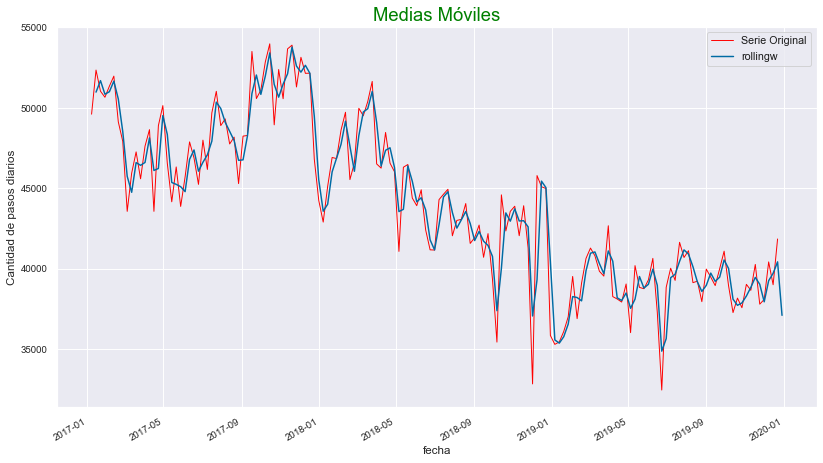

RMSE en Test: 1586.038


In [413]:
semanal['rollingw'] = semanal['cantidad_pasos'].rolling(2).mean()

plt.figure(figsize = (14,8), dpi=70)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
semanal['rollingw'].plot()
plt.title("Medias Móviles", color= 'green', fontsize= 19)
plt.ylabel('Cantidad de pasos diarios')
plt.legend()
plt.show()

y_test_mod3 = semanal['rollingw'].tail(12)

rmse_ts_3 = np.sqrt(mean_squared_error(y_test, y_test_mod3))
print('RMSE en Test:',round(rmse_ts_3,3))

* Mejora del Modelo Benchmark: Medias Móviles

Si bien el modelo benchmark es una predicción usando medias móviles, lo cual representa un grado de complejidad bajo, se puede explorar en qué cantidad de datos para la media se hace más precisa la estimación por este método.


Valor óptimo de orden para la media móvil: 4 



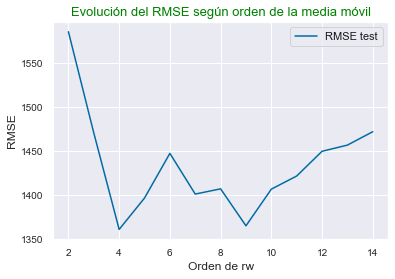

In [414]:
rmse_scores = []

# Rango de valores evaluados
rw_range = range(2, 15, 1)

# Ciclo para aplicar promedio móvil y calcular RMSE para cada valor del rango
for h in rw_range:
    semanal['rollingw'] = semanal['cantidad_pasos'].rolling(h).mean()
    y_train_mod3 = semanal['rollingw'][1:131]
    y_train_rw = y_train[1:]
    y_test_mod3 = semanal['rollingw'].tail(12)
    rmse_ts_3i = np.sqrt(mean_squared_error(y_test, y_test_mod3))
    rmse_scores.append(rmse_ts_3i)
    
# Gráfico de comportamiento del RMSE
fig, ax = plt.subplots(figsize=(6, 4))
ax.plot(rw_range, rmse_scores, label="RMSE test")
ax.set_ylabel("RMSE")
ax.set_xlabel("Orden de rw")
ax.set_title("Evolución del RMSE según orden de la media móvil",color='green',size=13)
plt.legend();
print()
print(f"Valor óptimo de orden para la media móvil: {rw_range[np.argmin(rmse_scores)]}","\n")

Como se identifica en el análisis gráfico, 4 y 9 son los valores óptimos para el orden de la media móvil (modelo benchmark) en los que se obtiene el mejor pronóstico.

### Evaluar la precisión de los modelos de pronóstico

Existen múltiples indicadores para evaluar la bondad de ajuste y la calidad de predicción de los modelos de series de tiempo. La decisión del modelo más apropiado debe tomarse analizando cada caso particular. Los criterios más utilizados son:

* ME (Mean Error)
* MPE (Mean Percentage Error)
* MAE (Mean Absolute Error)
* MAPE (Mean Absolute Percentage Error)
* MSE (Mean Squared Error)
* RMSE (Root Mean Square Error)
* AIC (Criterio de Akaike)

El principal criterio utilizado para la evaluación de los modelos es el RMSE. Su cálculo consiste en la raíz cuadrada de la sumatoria de los errores cuadráticos. RMSE expande y castiga con mayor fuerza aquellos errores de mayor magnitud. La fórmula de cálculo del RMSE se muestra a continuación:

$$RMSE = \sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$$

donde $$y_{i}: Predicción$$
$$x_{i}: Valor\thinspace actual$$

Para la evluación de los ajustes con SARIMAX se considera también el AIC como criterio de evaluación. AIC es una medida de calidad de pronósticos que hace un balance entre complejidad del modelo y bondad de ajuste.

In [395]:
result1= {'Modelo':['Rolling W (Benchmark)','Random Forest','SARIMAX'],
          'RMSE Test (con 2017)':[rmse_ts_3,rmse_ts_1,rmse_ts_sx1],
         'RMSE Test (sin 2017)':[rmse_ts_3,rmse_ts_2,rmse_ts_sx2]}
tabla=pd.DataFrame(result1)
tabla

,Modelo,RMSE Test (con 2017),RMSE Test (sin 2017)
0,Rolling W (Benchmark),"1,586","1,586"
1,Random Forest,"1,503","1,511"
2,SARIMAX,"1,588","1,392"


¿Cuál de los modelos elijo? R/ **Random Forest**.

**Justificación:** dentro de las ventajas del RF es que es un modelo que funciona bien aún sin ajuste de hiperparámetros. Más adelante se mostrará si es posible mejorar el desempeño del modelo. Adicional se selecciona este modelo porque es el que tiene un menor RMSE en test siendo entrenado con todos los datos disponibles (desde 2017).

4. Optimización de hiperparámetros

* Optimización Modelo 1: Random Forest

Como ya se mencionó, si bien en modelo de Random Forest funciona bien aún sin mejora de hiperparámetros, es interesante explorar qué tanto puede mejorar la predicción utilizando iteraciones para un rango de valores de n_estimators.

Valor óptimo de n_estimators por r2: 175 

Valor óptimo de n_estimators por RMSE: 175 



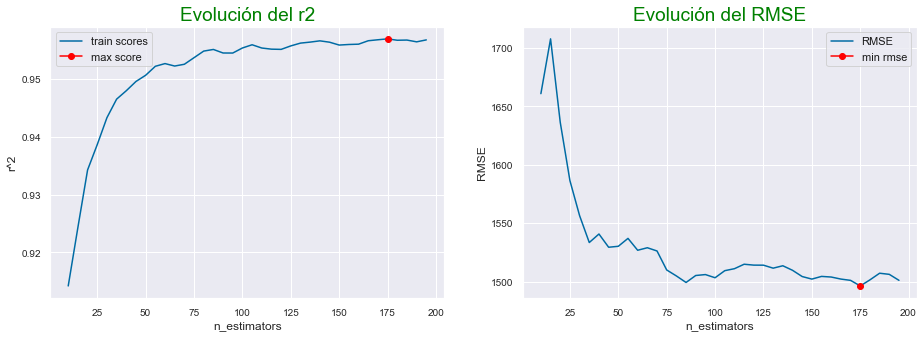

In [129]:
train_scores = []
rmse_score   = []

# Rango de valores evaluados
estimator_range = range(10, 200, 5)

# Ciclo para entrenar un modelo con cada valor de n_estimators y extraer su error de ajuste (entrenamiento)
for n_estimators in estimator_range:
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'mse',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    modelo.fit(X_train, y_train)
    y_test_modelo = modelo.predict(X_test)
    train_scores.append(modelo.score(X_train, y_train))
    rmse_score.append(np.sqrt(mean_squared_error(y_test, y_test_modelo)))


# Gráficos con la evolución de los errores
plt.figure(figsize = (24,5))
plt.subplot(1,3,1)
plt.plot(estimator_range, train_scores, label="train scores")
plt.plot(estimator_range[np.argmax(train_scores)], max(train_scores), marker='o', color = "red", label="max score")
plt.ylabel("r^2")
plt.xlabel("n_estimators")
plt.title("Evolución del r2 (train)",color= 'green', fontsize= 18)
plt.legend();
print(f"Valor óptimo de n_estimators por r2: {estimator_range[np.argmax(train_scores)]}","\n")

plt.subplot(1,3,2)
plt.plot(estimator_range, rmse_score, label="RMSE")
plt.plot(estimator_range[np.argmin(rmse_score)], min(rmse_score), marker='o', color = "red", label="min rmse")
plt.ylabel("RMSE")
plt.xlabel("n_estimators")
plt.title("Evolución del RMSE (test)",color= 'green', fontsize= 18)
plt.legend();
print(f"Valor óptimo de n_estimators por RMSE: {estimator_range[np.argmin(rmse_score)]}","\n")

In [398]:
# Modelo Random Forest Optimizado
n_estimators = 175

# Random forest regressor con datos desde 2017
rf = RandomForestRegressor(n_estimators = n_estimators, random_state=123, n_jobs = -1)

rf.fit(X_train,y_train)
x = rf.fit(X_train,y_train)

y_train_pred_rf1 = rf.predict(X_train)
y_test_pred_rf1 = rf.predict(X_test)

# Random forest regressor sin datos de 2017

rf2 = RandomForestRegressor(n_estimators = n_estimators, random_state=123, n_jobs = -1)

rf2.fit(X_train2,y_train2)
x2 = rf2.fit(X_train2,y_train2)

y_train_pred_rf2 = rf2.predict(X_train2)
y_test_pred_rf2 = rf2.predict(X_test2)

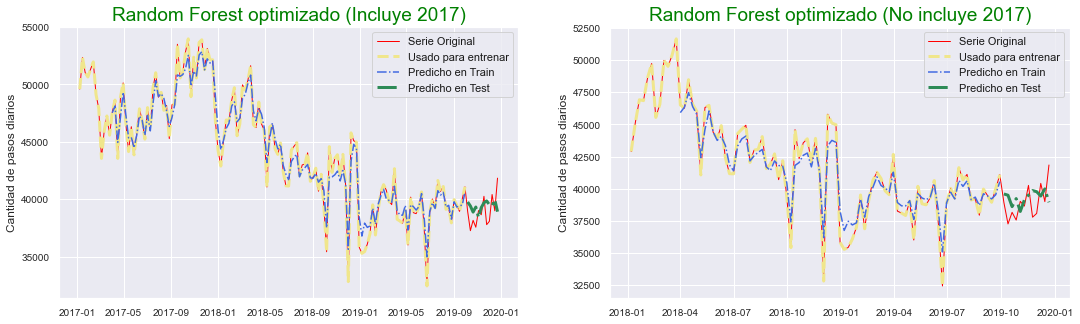


RMSE en Train con 2017: 1018.217
RMSE en Test con 2017: 1496.436

RMSE en Train sin 2017: 1028.46
RMSE en Test sin 2017: 1507.577



In [399]:
plt.figure(figsize = (28,5))
plt.subplot(1,3,1)
plt.plot(senial.index[:length_total], senial[:length_total],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial.index[:N_train + look_back], senial[:N_train + look_back],'--', lw = 3,color='khaki',label = 'Usado para entrenar')
plt.plot(senial.index[look_back: look_back + N_train], y_train_pred_rf1,'-.',color='royalblue',label = 'Predicho en Train')
plt.plot(senial.index[N_train+look_back: length_total], y_test_pred_rf1,'-.',color='seagreen', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title("Random Forest optimizado (Incluye 2017)", color= 'green', fontsize= 19)
plt.ylabel('Cantidad de pasos diarios')

plt.subplot(1,3,2)
plt.plot(senial2.index[:length_total2], senial2[:length_total2],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial2.index[:N_train2 + look_back], senial2[:N_train2 + look_back],'--',lw=3,color='khaki',label='Usado para entrenar')
plt.plot(senial2.index[look_back: look_back + N_train2], y_train_pred_rf2,'-.',color='royalblue',label = 'Predicho en Train')
plt.plot(senial2.index[N_train2+look_back: length_total2], y_test_pred_rf2,'-.',color='seagreen', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title("Random Forest optimizado (No incluye 2017)", color= 'green', fontsize= 19)
plt.ylabel('Cantidad de pasos diarios')

plt.show()

print()
rmse_tr_1 = np.sqrt(mean_squared_error(y_train, y_train_pred_rf1))
print('RMSE en Train con 2017:',round(rmse_tr_1,3))

rmse_ts_1 = np.sqrt(mean_squared_error(y_test, y_test_pred_rf1))
print('RMSE en Test con 2017:',round(rmse_ts_1,3))
print()

rmse_tr_2 = np.sqrt(mean_squared_error(y_train2, y_train_pred_rf2))
print('RMSE en Train sin 2017:',round(rmse_tr_2,3))

rmse_ts_2 = np.sqrt(mean_squared_error(y_test2, y_test_pred_rf2))
print('RMSE en Test sin 2017:',round(rmse_ts_2,3))
print()

Usando iteraciones simples para buscar el número de n_estimators que presenta mejor performance (medido con r2 y RMSE), se identifica que el mejor desempeño se obtiene con 175 n_estimators. Con el aumento de n_estimators por encima de 90, el RMSE sigue disminuyendo, pero no en forma significativa. Por tanto se asume que dado las demandas computacionales crecientes en comparación con la poca ganancia en desempeño, se identifica alrededor de 86 n_estimators como el número más apropiado para ajustar Random Forest al problema específico del tráfico vehicular por esta autopista.

5. ¿Qué información está usando el modelo para predecir?

Se tomará únicamente modelo XXX para evaluar la significancia.

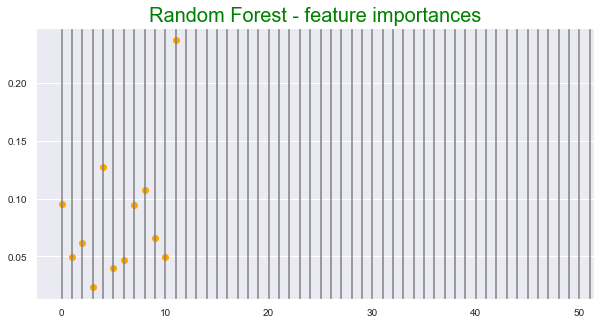

In [53]:
# Si el modelo lo permite, debes explorar qué información utiliza para predecir e interpretar ese resultado.
# ¿Coincide con lo que esperabas a partir de tu experiencia con el dataset?

plt.figure(figsize = (10,5))
plt.scatter(np.arange(rf2.feature_importances_.size),rf2.feature_importances_,color='orange')
plt.title( "Random Forest - feature importances",color='green',size=18) 
for x in range(52):
    plt.axvline(x, linestyle ='-', color= 'gray')
    
plt.show()

In [117]:
rf2.feature_importances_

array([0.09572395, 0.04915085, 0.06133194, 0.02357412, 0.12776161,
       0.03988321, 0.0469969 , 0.0942096 , 0.10790666, 0.06602985,
       0.04987187, 0.23755943])

De los datos usados para inicializar el modelo de Random Forest, se observa que el dato más relevante para la predicción es el último del conjunto inicial. Adicional llama la atención que dos datos adicionales tienen nivel de significancia mayor a 0.10, lo que quiere decir que el modelo encuentra patrones y relaciones entre los datos más allá de la última observación.

- Modelo seleccionado

Luego de revisar el performance de los modelos, tanto en ajuste como en predicción, así como los criterios de evaluación, se concluye que para este caso en particular (predecir el tráfico de vehicular por la autopista Illia) el mejor modelo de los evaluados es el Random Forest.

6. Predicción de tráfico en el año 2020.

La predicción de tráfico en el año 2020 se realizará únicamente con el modelo final Random Forest.

In [400]:
# Preparación general del dataset

data_2020 = pd.read_csv('flujo-vehicular-20202.csv', sep =',')
# Unimos los 3 datasets, podemos hacerlo así directamente ya que tienen las mismas columnas
dataset2 = pd.concat([data_2020, data_2019, data_2018, data_2017])
# Nos quedamos solamente con la estación Illia y la forma de pago Efectivo
mask = np.logical_and(dataset2.estacion=='Illia', dataset2.forma_pago == 'EFECTIVO')
dataset2 = dataset2[mask]
# Quitamos las columnas que no vamos a utilizar
dataset2.drop(columns = ['periodo','hora_inicio','forma_pago', 'estacion'], inplace = True)
# Pasamos la columna fecha a formato datetime, y le unimos la hora_fin como hora
dataset2['fecha2'] = pd.to_datetime(dataset2.fecha) + pd.to_timedelta(dataset2.hora_fin, unit = 'h')
# Quitamos las columnas fecha y hora_fin ya que las incluimos en el campo fecha2
dataset2.drop(columns=['fecha','hora_fin'], inplace = True)
# Corregimos el nombre de fecha2 a fecha
dataset2.rename(columns = {'fecha2':'fecha'}, inplace = True) 
# Reordenamos el dataset por fecha
dataset2.sort_values('fecha', inplace = True)
dataset2.reset_index(drop=True, inplace = True)
# Resampleamos nuestros datos para agrupar por dia, y asi tal vez lograr una visualización mas amigable
diario2 = dataset2.resample('D', on = 'fecha').sum()
#Los datos atípicos se reemplazan por nan
diario2.cantidad_pasos[diario2.cantidad_pasos <=15000] = np.nan
# Se indica el criterio para interpolar
diario2 = diario2.interpolate(method='nearest', k=4)
# Se vuelven cero los nan
diario2['cantidad_pasos'] = diario2['cantidad_pasos'].replace(np.nan, 0)
# Transformación a semanal por medias (a la base sin ceros y sin outliers)
semanal2020 = diario2.resample('W').mean()
# Se quitan unos datos de semanas que están incompletas
semanal2020 = semanal2020[(semanal2020.index >='2017-01-08')&(semanal2020.index <='2020-12-29')]
senial2020 = semanal2020.cantidad_pasos

In [401]:
# Valores para atrás que vamos a tomar
look_back = 39 

N = senial2020.shape[0]
X = np.zeros((N - look_back - 1,look_back))
y = np.zeros(N - look_back - 1)
print(X.shape, y.shape)

for i in range(X.shape[0]):
    X[i,:] = senial2020.iloc[i:i+look_back]
    y[i] = senial2020.iloc[i+look_back]

# train test split con datos desde 2017
N_train = 156 - look_back # cantidad de instancias que vamos a usar para entrenar.
N_test = 39  # cantidad de puntos que vamos a usar para evaluar
N_total = N_train + N_test

length_total = N_train + N_test + look_back

X_train = X[:N_train,:]
y_train = y[:N_train]
print(X_train.shape, y_train.shape)

X_test = X[N_train:N_train+N_test,:]
y_test = y[N_train:N_train+N_test]
print(X_test.shape, y_test.shape)

(168, 39) (168,)
(117, 39) (117,)
(39, 39) (39,)


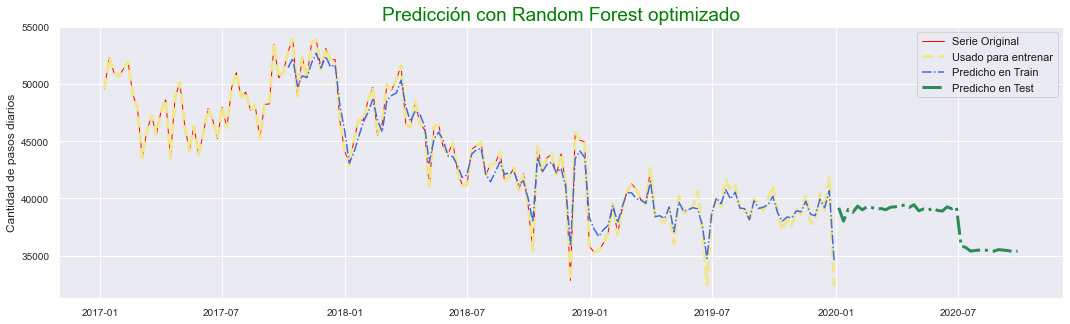

In [402]:
# Modelo Random Forest Optimizado
n_estimators = 175

rfp = RandomForestRegressor(n_estimators = n_estimators, random_state=123, n_jobs = -1)

rfp.fit(X_train,y_train)
x = rfp.fit(X_train,y_train)

y_train_pred_rfp = rfp.predict(X_train)
y_test_pred_rfp = rfp.predict(X_test)

plt.figure(figsize = (18,5))
plt.plot(senial2020.index[:N_train], senial2020[:N_train],lw = 1, color='red', label = 'Serie Original')
plt.plot(senial2020.index[:N_train + look_back], senial2020[:N_train + look_back],'--', lw = 3,color='khaki',label = 'Usado para entrenar')
plt.plot(senial2020.index[look_back: look_back + N_train], y_train_pred_rfp,'-.',color='royalblue',label = 'Predicho en Train')
plt.plot(senial2020.index[N_train+look_back: length_total], y_test_pred_rfp,'-.',color='seagreen', lw = 3, label = 'Predicho en Test')
plt.legend()
plt.title("Predicción con Random Forest optimizado", color= 'green', fontsize= 19)
plt.ylabel('Cantidad de pasos diarios')
plt.show()

### Parte C - Para pensar, investigar y, opcionalmente, implementar
<div style="color:#604039; font-style: normal; font-family: Helvetica;">
1. ¿Cómo incorporarías la información sobre tipo de vehículo, forma de pago, sentido, día de la semana, etc.? En lo que respecta a las predicciones, ¿mejoran o empeoran?<br />
2. ¿Qué ocurre si comparas las series de tiempo entre distintas estaciones de peajes?¿Tienen el mismo comportamiento o hay alguna que sea distinta a las otras? Si es así, ¿hay información auxiliar que te ayude a explicar lo que encuentras?<br />
3. ¿Hay algo que te gustaría investigar o probar?<br />
<br />

**Próximos pasos y resultados esperados**

Para explorar con mayor profundidad el problema de prónostico de tráfico, sería interesante:

1. Realizar pronósticos independientes para la tendencia y la estacionalidad.

- Problema a resolver: algunos conjuntos de datos presentan mayor complejidad al ser analizados de forma general que al analizarlos por componentes (o de forma individual).
- Forma de llegar a la respuesta: tanto para modelar la tendencia y la estacionalidad de forma separada, es posible aplicar los modelos de pronóstico ya conocidos: modelos lineales, exponenciales, modelos ARIMA, etc. Al final del análisis individual se consolidan según el tipo de descomposición seleccionado (aditivo o multiplicativo).
- Resultados esperados: en ocasiones la separación por componentes y el análisis individual reduce la complejidad ajuste y posterior pronóstico de los datos, y con esa simplificación en ocasiones es posible obtener mejor performance de los modelos.

2. Considerar el concepto de incertidumbre aleatoria e incertidumbre epistémica.

- Problema a resolver: identificar la presencia y el nivel de incidencia de la **incertidumbre aleatoria** y de la **incertidumbre epistémica** en el problema de tráfico por la autopista, entendiendo que "*la incertidumbre aleatoria es la que se refiere a la variabilidad de soluciones correctas dada la misma información; y la incertidumbre epistémica es la relacionada con nuestro desconocimiento sobre qué método utilizar para solucionar el problema o incluso nuestra ignorancia respecto nuevos tipos de datos que no vimos en el pasado*". Fuente: [BBVA AI Factory](https://www.bbvaaifactory.com/es/improving-predictions-in-deep-learning-by-modelling-uncertainty-2/)

- Forma de llegar a la respuesta: implementando modelos que permitan hacer predicciones en escenarios con incertidumbre y sin incertidumbre. Técnicas de Aprendizaje Profundo (*Deep Learning*) permiten la construcción de modelos con dichas características.
- Resultados esperados: una variabilidad menor a la hora de hacer predicciones.

3. Utilizar técnicas de mayor complejidad buscando un modelo con un performance significativamente mejor.

- Problema a resolver: las técnicas explicadas en el notebook tienen un desempeño que puede ser mejorado (menor error, mayor precisión) si se utilizan otras técnicas de pronósticos.
- Forma de llegar a la respuesta: el uso de modelos de deep learning como redes neuronales, las cuales son construidas y entrenadas con herramientas como Keras y Tensorflow, y son una alternativa que de manera general ofrece ventajas sobre la programación tradicional.
- Resultados esperados: descubrimiento de patrones complejos que se pueden identificar gracias a modelos de múltiples redes neuronales artificiales con muchísimas capas, apiladas una encima de la otra, donde cada una de ellas está a su vez compuesta por muchísimas neuronas. [Ver más](https://torres.ai/deep-learning-inteligencia-artificial-keras/)

Adicional, un mejor modelo no necesariamente es el que da un mejor performance en pronóstico. También lo es aquel modelo con la misma o mejor capacidad de pronóstico a partir de una menor cantidad de datos. Esto es importante porque el mundo cada vez genera cambios más acelerados desde diversos puntos de vista, por lo cual en períodos grandes de observaciones (datos) hay menor probabilidad de cumplir el supuesto de continuidad.

**Aprendizajes y comentarios sobre la metodología**

Dentro de las series de tiempo hay diversos tipos de modelos y alternativas de efectuar ajustes y predicciones. La metodología anteriormente expuesta sigue un nivel básico de aplicación, que se evidencia en varios aspectos, a saber:
* Solo se realizan ajustes de un modelo para toda la serie (ajustes globales). Las series, en especial la tendencia y la estacionalidad pueden modelarse por tramos.
* No se realiza caracterización de los ciclos (análisis detallado de los errores).
* No se aplican pruebas (tests) de normalidad ni se validan otros supuestos de los modelos.
* No se aplican métodos de estimación recursiva

Aún con todo lo anterior, el presente trabajo representa un buen primer acercamiento personal del uso de Python y herramientas de Data Science para el estudio y análisis de series de tiempo.